In [1]:
import pandas as pd
import io
from google.colab import files
#uploaded=files.upload()
#df=pd.read_csv(io.BytesIO(uploaded['Outfielders_Final.csv']))
df = pd.read_csv("https://raw.githubusercontent.com/sameerprasadkoppolu/Soccer-Player-Recommendation-System/master/Outfielders_Final.csv")

# Players Who have Played At Least 450 Mins

In [2]:
df = df.loc[df['Min_Playing'] >= 450]
df = df.reset_index()
df.drop(columns = ['index'], inplace = True)

pd.set_option('display.max_columns', 500)

In [3]:
len(df)

2516

In [4]:
df.head()

Player Nation   Age    Born  MP_Playing  Starts_Playing  \
0    Yunus Musah    USA  19.0  2004.0        33.0              26   
1  Matheus Costa    BRA  27.0  1996.0        20.0              13   
2         Carlos    BRA  23.0  2000.0        35.0              35   
3      Leny Yoro    FRA  16.0  2007.0        13.0               8   
4   Steve Mounié    BEN  27.0  1996.0        23.0              20   

   Min_Playing  Gls  Ast  PK  PKatt  xG_Expected  npxG_Expected  xAG_Expected  \
0         2110    0    2   0      0          1.8            1.8           1.8   
1         1084    0    0   0      0          0.3            0.3           0.1   
2         3083    6    5   0      0          4.4            4.4           3.7   
3          769    0    0   0      0          0.1            0.1           0.0   
4         1655    6    0   1      1          7.3            6.5           0.8   

   PrgC_Progression  PrgP_Progression  PrgR_Progression  Mins_Per_90  \
0              72.0              93.0             101.0         23.4   
1               5.0              23.0               0.0         12.0   
2              87.0             101.0             151.0         34.3   
3               0.0              15.0               1.0          8.5   
4              23.0              32.0              89.0         18.4   

   Tkl_Tackles  TklW_Tackles  Def 3rd_Tackles  Mid 3rd_Tackles  \
0         48.0            35             17.0             23.0   
1         22.0            16             15.0              5.0   
2         73.0            38             42.0             23.0   
3         11.0             5              8.0              3.0   
4         13.0             5              1.0              7.0   

   Att 3rd_Tackles  Tkl_Challenges  Att_Challenges  Lost_Challenges  \
0              8.0            20.0            30.0             10.0   
1              2.0            10.0            15.0              5.0   
2              8.0            33.0            54.0             21.0   
3              0.0             4.0             9.0              5.0   
4              5.0             5.0            14.0              9.0   

   Sh_Blocks  Pass_Blocks  Int   Clr  Err  Cmp_Total  Att_Total  \
0        1.0         19.0   11  16.0  2.0      604.0      771.0   
1        7.0          4.0   15  50.0  1.0      448.0      539.0   
2        6.0         18.0   24  85.0  1.0     1430.0     1719.0   
3        1.0          5.0   18  27.0  1.0      514.0      565.0   
4        7.0         11.0    3  20.0  0.0      253.0      458.0   

   TotDist_Total  PrgDist_Total  Cmp_Short  Att_Short  Cmp_Medium  Att_Medium  \
0        10218.0         2277.0      293.0      348.0       252.0       296.0   
1         8963.0         3243.0      138.0      155.0       255.0       274.0   
2        22788.0         6775.0      743.0      811.0       566.0       665.0   
3         9564.0         2895.0      177.0      186.0       271.0       287.0   
4         3503.0          841.0      139.0      238.0        89.0       147.0   

   Cmp_Long  Att_Long   xA    KP  Final_Third   PPA  CrsPA  Sh_Standard  \
0      43.0      64.0  1.8  16.0         52.0  12.0    4.0           22   
1      49.0      93.0  0.1   4.0         24.0   0.0    0.0            6   
2      82.0     133.0  3.4  26.0         75.0  27.0    7.0           42   
3      55.0      79.0  0.1   1.0         11.0   0.0    0.0            2   
4       5.0      15.0  1.3  13.0         26.0   3.0    0.0           58   

   SoT_Standard  Dist_Standard  FK_Standard     Att  Live_Pass  Dead_Pass  \
0             3           18.4          0.0   771.0      757.0       12.0   
1             2           14.4          0.0   539.0      522.0       15.0   
2            16           15.0          0.0  1719.0     1409.0      305.0   
3             0           15.9          0.0   565.0      537.0       28.0   
4            19           14.9          0.0   458.0      454.0        2.0   

   FK_Pass  TB_Pass  Sw_Pass  Crs_Pass  TI_Pass

# Convert to Per 90 Stats

In [5]:
#Ignore 'Mins Per 90' since it represents the number of minutes a player has played per every full 90 minutes.
cols = list(df.columns)[7:]
cols.remove('Mins_Per_90')

In [6]:
print(cols)

['Gls', 'Ast', 'PK', 'PKatt', 'xG_Expected', 'npxG_Expected', 'xAG_Expected', 'PrgC_Progression', 'PrgP_Progression', 'PrgR_Progression', 'Tkl_Tackles', 'TklW_Tackles', 'Def 3rd_Tackles', 'Mid 3rd_Tackles', 'Att 3rd_Tackles', 'Tkl_Challenges', 'Att_Challenges', 'Lost_Challenges', 'Sh_Blocks', 'Pass_Blocks', 'Int', 'Clr', 'Err', 'Cmp_Total', 'Att_Total', 'TotDist_Total', 'PrgDist_Total', 'Cmp_Short', 'Att_Short', 'Cmp_Medium', 'Att_Medium', 'Cmp_Long', 'Att_Long', 'xA', 'KP', 'Final_Third', 'PPA', 'CrsPA', 'Sh_Standard', 'SoT_Standard', 'Dist_Standard', 'FK_Standard', 'Att', 'Live_Pass', 'Dead_Pass', 'FK_Pass', 'TB_Pass', 'Sw_Pass', 'Crs_Pass', 'TI_Pass', 'CK_Pass', 'In_Corner', 'Out_Corner', 'Str_Corner', 'Cmp_Outcomes', 'Off_Outcomes', 'Blocks_Outcomes', 'SCA_SCA', 'PassLive_SCA', 'PassDead_SCA', 'TO_SCA', 'Sh_SCA', 'Fld_SCA', 'Def_SCA', 'GCA_GCA', 'PassLive_GCA', 'PassDead_GCA', 'TO_GCA', 'Sh_GCA', 'Fld_GCA', 'Def_GCA', 'Touches_Touches', 'Def Pen_Touches', 'Def 3rd_Touches', 'Mid 3r

In [7]:
for i in cols:
  if (i == 'Pos') or (i == 'Squad'):
    continue
  else:
    for j in range(len(df)):
      temp = df.loc[j, i]
      df.loc[j, i] = round(df.loc[j, i] * 90.0 / df.loc[j, 'Min_Playing'], 3)
      #df.loc[j, i] = round(df.loc[j, i]  / df.loc[j, 'MP_Playing'], 2)


In [8]:
df.head()

Player Nation   Age    Born  MP_Playing  Starts_Playing  \
0    Yunus Musah    USA  19.0  2004.0        33.0              26   
1  Matheus Costa    BRA  27.0  1996.0        20.0              13   
2         Carlos    BRA  23.0  2000.0        35.0              35   
3      Leny Yoro    FRA  16.0  2007.0        13.0               8   
4   Steve Mounié    BEN  27.0  1996.0        23.0              20   

   Min_Playing    Gls    Ast     PK  PKatt  xG_Expected  npxG_Expected  \
0         2110  0.000  0.085  0.000  0.000        0.077          0.077   
1         1084  0.000  0.000  0.000  0.000        0.025          0.025   
2         3083  0.175  0.146  0.000  0.000        0.128          0.128   
3          769  0.000  0.000  0.000  0.000        0.012          0.012   
4         1655  0.326  0.000  0.054  0.054        0.397          0.353   

   xAG_Expected  PrgC_Progression  PrgP_Progression  PrgR_Progression  \
0         0.077             3.071             3.967             4.308   
1         0.008             0.415             1.910             0.000   
2         0.108             2.540             2.948             4.408   
3         0.000             0.000             1.756             0.117   
4         0.044             1.251             1.740             4.840   

   Mins_Per_90  Tkl_Tackles  TklW_Tackles  Def 3rd_Tackles  Mid 3rd_Tackles  \
0         23.4        2.047         1.493            0.725            0.981   
1         12.0        1.827         1.328            1.245            0.415   
2         34.3        2.131         1.109            1.226            0.671   
3          8.5        1.287         0.585            0.936            0.351   
4         18.4        0.707         0.272            0.054            0.381   

   Att 3rd_Tackles  Tkl_Challenges  Att_Challenges  Lost_Challenges  \
0            0.341           0.853           1.280            0.427   
1            0.166           0.830           1.245            0.415   
2            0.234           0.963           1.576            0.613   
3            0.000           0.468           1.053            0.585   
4            0.272           0.272           0.761            0.489   

   Sh_Blocks  Pass_Blocks    Int    Clr    Err  Cmp_Total  Att_Total  \
0      0.043        0.810  0.469  0.682  0.085     25.763     32.886   
1      0.581        0.332  1.245  4.151  0.083     37.196     44.751   
2      0.175        0.525  0.701  2.481  0.029     41.745     50.182   
3      0.117        0.585  2.107  3.160  0.117     60.156     66.125   
4      0.381        0.598  0.163  1.088  0.000     13.758     24.906   

   TotDist_Total  PrgDist_Total  Cmp_Short  Att_Short  Cmp_Medium  Att_Medium  \
0        435.839         97.123     12.498     14.844      10.749      12.626   
1        744.161        269.253     11.458     12.869      21.172      22.749   
2        665.235        197.778     21.690     23.675      16.523      19.413   
3       1119.324        338.817     20.715     21.769      31.717      33.589   
4        190.495         45.734      7.559     12.943       4.840       7.994   

   Cmp_Long  Att_Long     xA     KP  Final_Third    PPA  CrsPA  Sh_Standard  \
0     1.834     2.730  0.077  0.682        2.218  0.512  0.171        0.938   
1     4.068     7.721  0.008  0.332        1.993  0.000  0.000        0.498   
2     2.394     3.883  0.099  0.759        2.189  0.788  0.204        1.226   
3     6.437     9.246  0.012  0.117        1.287  0.000  0.000        0.234   
4     0.272     0.816  0.071  0.707        1.414  0.163  0.000        3.154   

   SoT_Standard  Dist_Standard  FK_Standard     Att  Live_Pass  Dead_Pass  \
0         0.128          0.785          0.0  32.886     32.289      0.512   
1         0.166          1.196          0.0  44.751     43.339      1.245   
2         0.467          0.438          0.0  50.182     41.132      8.904   
3         0.000          1.861          0.0  66.125     62.848      3.277   
4         1.033          0.81

In [9]:
import warnings
warnings.filterwarnings("ignore")

# Perform PCA to Perform Dimensionality Reduction by Choosing the Components That Explain 95% Of the Variance

In [10]:
##Perform Data Normalization and Dimensionality Reduction Using PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import set_config

pipeline = Pipeline([('standard scaling', StandardScaler()), ('pca', PCA(n_components = 0.95, svd_solver = 'full', random_state = 40))])

pca_df = df.copy()
pca_df = pca_df.fillna(0)
pca_df.drop(columns = ['Player', 'Nation', 'Pos', 'Age', 'Born', 'Squad', 'MP_Playing'], inplace = True)

set_config(display='diagram')

pipeline

Pipeline(steps=[('standard scaling', StandardScaler()),
                ('pca',
                 PCA(n_components=0.95, random_state=40, svd_solver='full'))])

In [11]:
pca_df.head()

Starts_Playing  Min_Playing    Gls    Ast     PK  PKatt  xG_Expected  \
0              26         2110  0.000  0.085  0.000  0.000        0.077   
1              13         1084  0.000  0.000  0.000  0.000        0.025   
2              35         3083  0.175  0.146  0.000  0.000        0.128   
3               8          769  0.000  0.000  0.000  0.000        0.012   
4              20         1655  0.326  0.000  0.054  0.054        0.397   

   npxG_Expected  xAG_Expected  PrgC_Progression  PrgP_Progression  \
0          0.077         0.077             3.071             3.967   
1          0.025         0.008             0.415             1.910   
2          0.128         0.108             2.540             2.948   
3          0.012         0.000             0.000             1.756   
4          0.353         0.044             1.251             1.740   

   PrgR_Progression  Mins_Per_90  Tkl_Tackles  TklW_Tackles  Def 3rd_Tackles  \
0             4.308         23.4        2.047         1.493            0.725   
1             0.000         12.0        1.827         1.328            1.245   
2             4.408         34.3        2.131         1.109            1.226   
3             0.117          8.5        1.287         0.585            0.936   
4             4.840         18.4        0.707         0.272            0.054   

   Mid 3rd_Tackles  Att 3rd_Tackles  Tkl_Challenges  Att_Challenges  \
0            0.981            0.341           0.853           1.280   
1            0.415            0.166           0.830           1.245   
2            0.671            0.234           0.963           1.576   
3            0.351            0.000           0.468           1.053   
4            0.381            0.272           0.272           0.761   

   Lost_Challenges  Sh_Blocks  Pass_Blocks    Int    Clr    Err  Cmp_Total  \
0            0.427      0.043        0.810  0.469  0.682  0.085     25.763   
1            0.415      0.581        0.332  1.245  4.151  0.083     37.196   
2            0.613      0.175        0.525  0.701  2.481  0.029     41.745   
3            0.585      0.117        0.585  2.107  3.160  0.117     60.156   
4            0.489      0.381        0.598  0.163  1.088  0.000     13.758   

   Att_Total  TotDist_Total  PrgDist_Total  Cmp_Short  Att_Short  Cmp_Medium  \
0     32.886        435.839         97.123     12.498     14.844      10.749   
1     44.751        744.161        269.253     11.458     12.869      21.172   
2     50.182        665.235        197.778     21.690     23.675      16.523   
3     66.125       1119.324        338.817     20.715     21.769      31.717   
4     24.906        190.495         45.734      7.559     12.943       4.840   

   Att_Medium  Cmp_Long  Att_Long     xA     KP  Final_Third    PPA  CrsPA  \
0      12.626     1.834     2.730  0.077  0.682        2.218  0.512  0.171   
1      22.749     4.068     7.721  0.008  0.332        1.993  0.000  0.000   
2      19.413     2.394     3.883  0.099  0.759        2.189  0.788  0.204   
3      33.589     6.437     9.246  0.012  0.117        1.287  0.000  0.000   
4       7.994     0.272     0.816  0.071  0.707        1.414  0.163  0.000   

   Sh_Standard  SoT_Standard  Dist_Standard  FK_Standard     Att  Live_Pass  \
0        0.938         0.128          0.785          0.0  32.886     32.289   
1        0.498         0.166          1.196          0.0  44.751     43.339   
2        1.226         0.467          0.438          0.0  50.182     41.132   
3        0.234         0.000          1.861          0.0  66.125     62.848   
4        3.154         1.033          0.810          0.0  24.906     24.689   

   Dead_Pass  FK_Pass  TB_Pass  Sw_Pass  Crs_Pass  TI_Pass  CK_Pass  \
0      0.512    0.128    0.128    0.469     1.706    0.384      0.0   
1      1.245    1.162    0.000    0.581     0.000    0.000      0.0   
2      8.904    0.584    0.058    0.204     1.576    8.174      0.0   
3      3.277    2.341    0.000    0.117     0

In [12]:
z = pipeline.fit_transform(pca_df)

In [13]:
#We can see that after PCA we have 42 Variables
z.shape

(2516, 42)

In [14]:
#Create a New Dataframe and store these new variable values against each player
final_df = pd.DataFrame()

l = ['Player', 'Nation', 'Pos', 'Age', 'Born', 'Squad']

for i in l:
  final_df[i] = df[i]

for i in range(z.shape[1]):
  col = 'x' + str(i+1)
  final_df[col] = z[:,i]

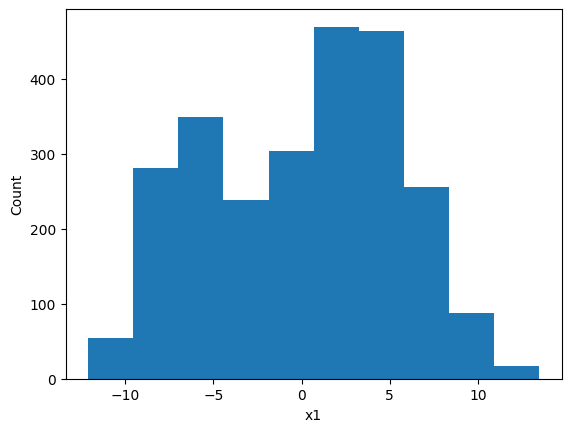

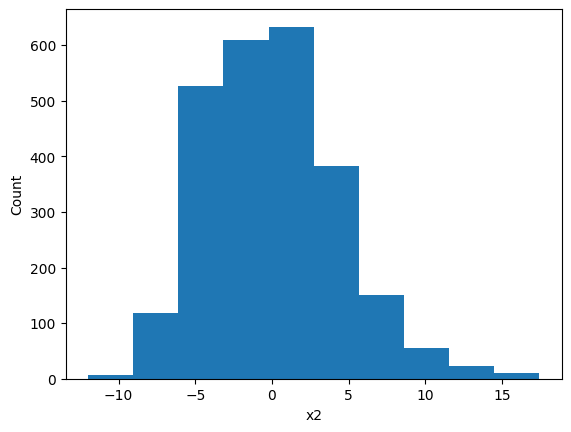

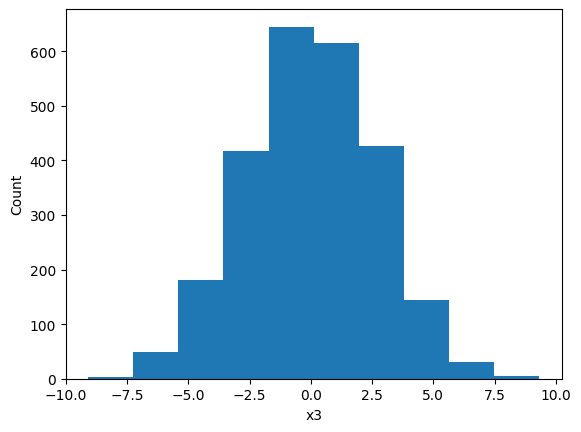

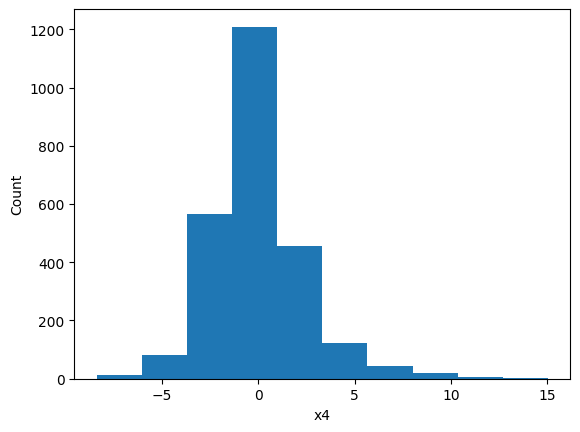

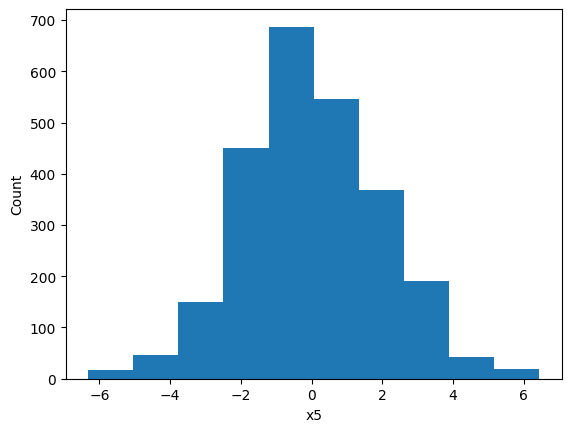

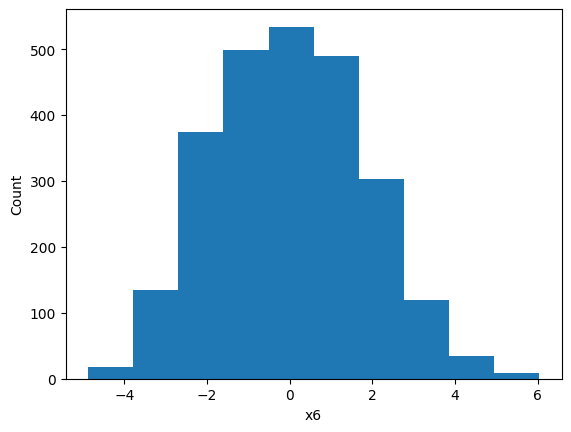

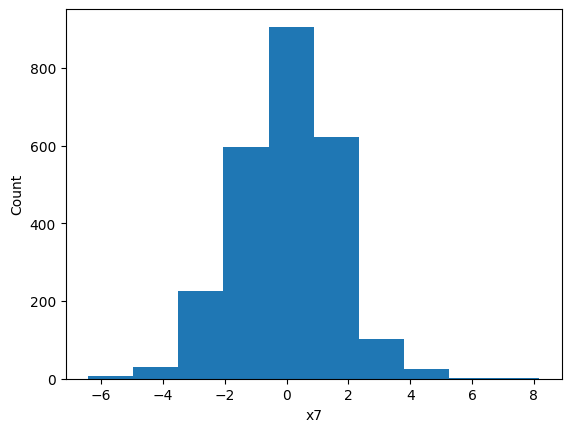

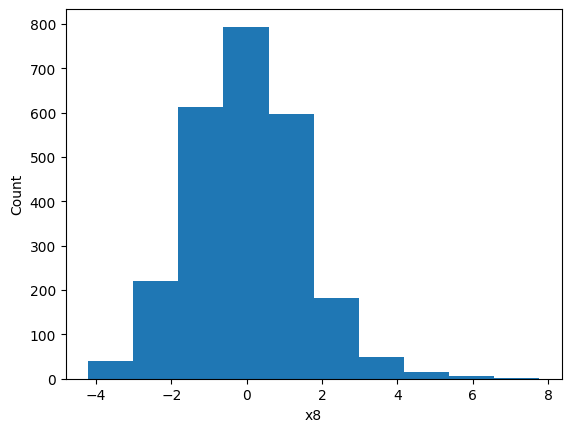

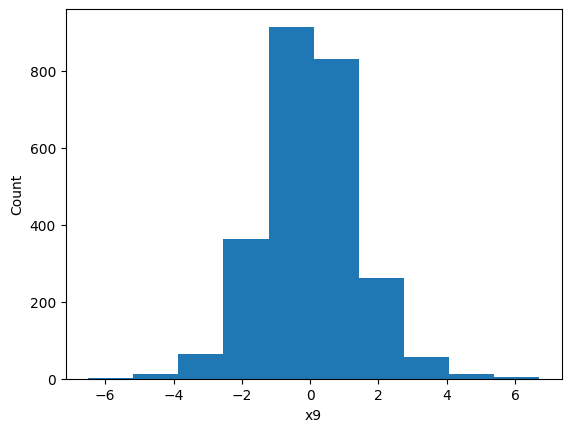

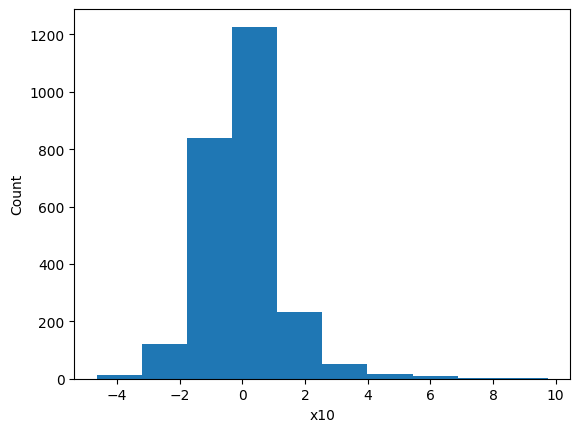

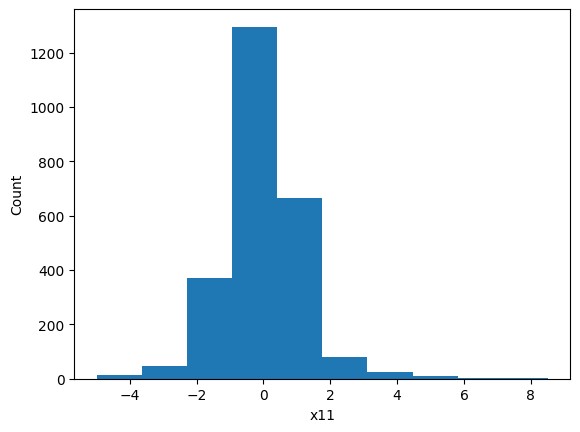

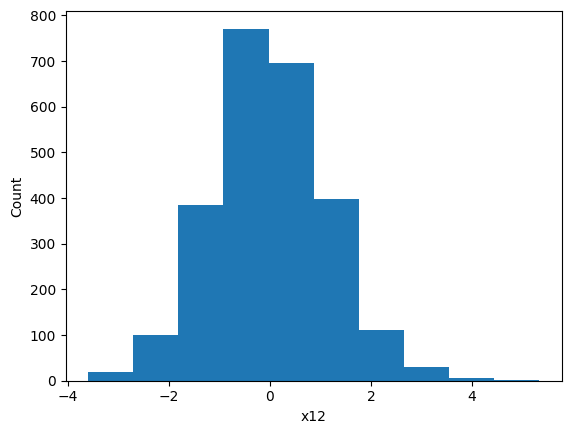

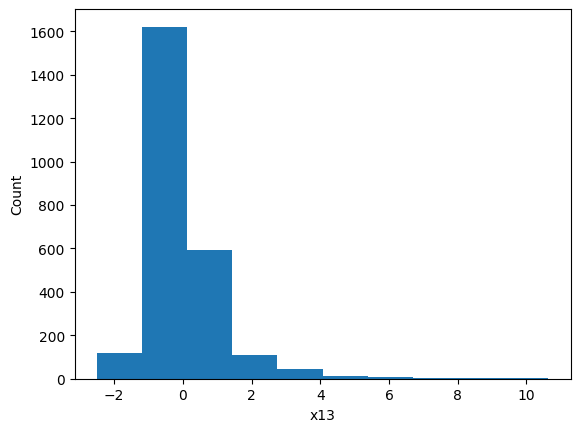

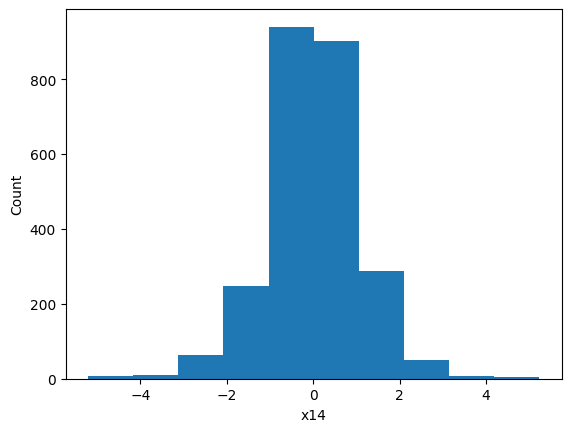

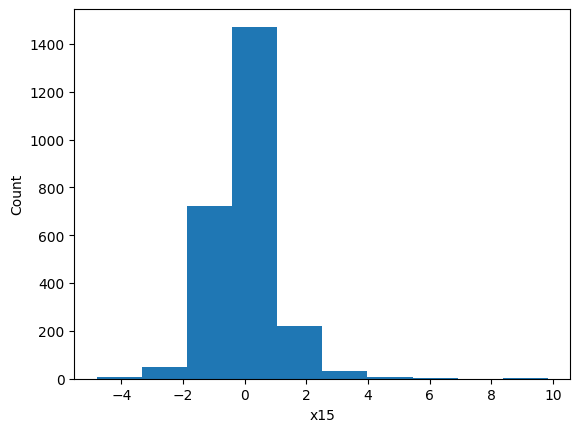

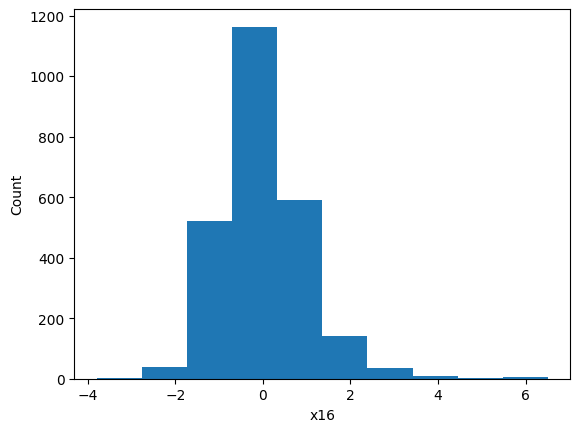

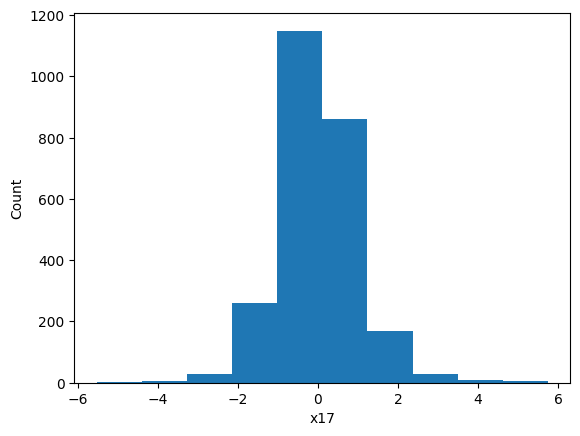

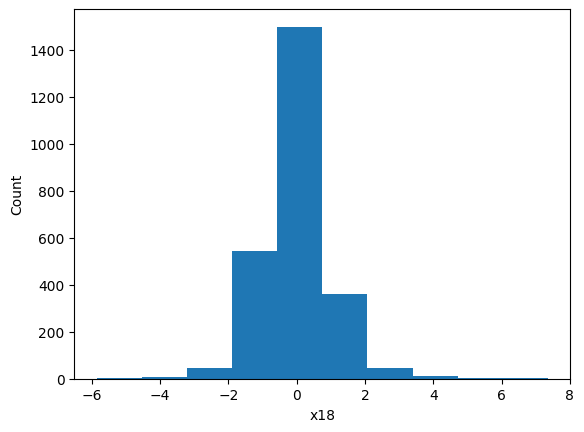

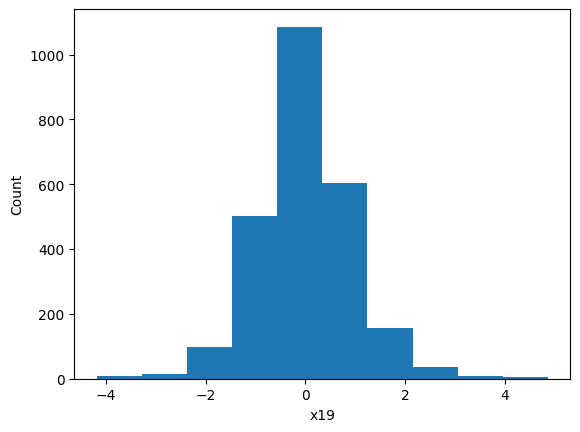

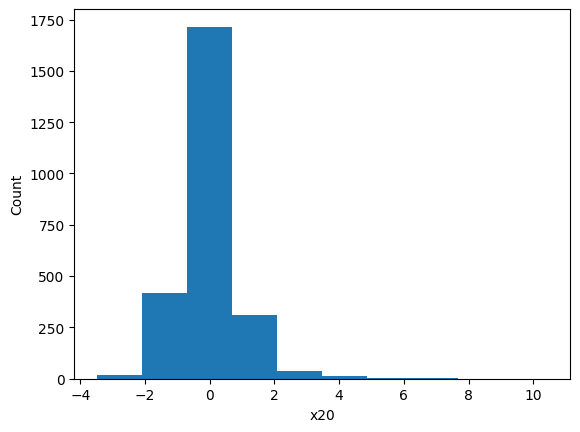

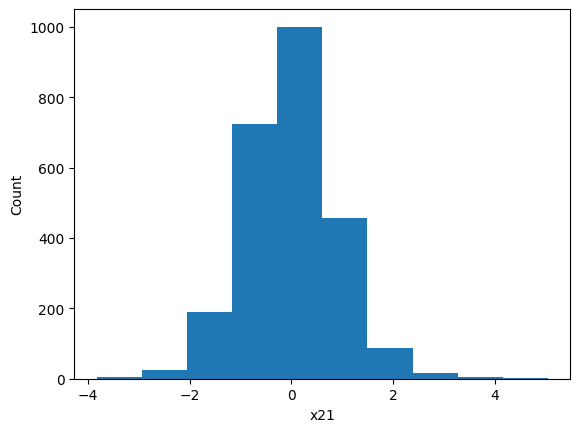

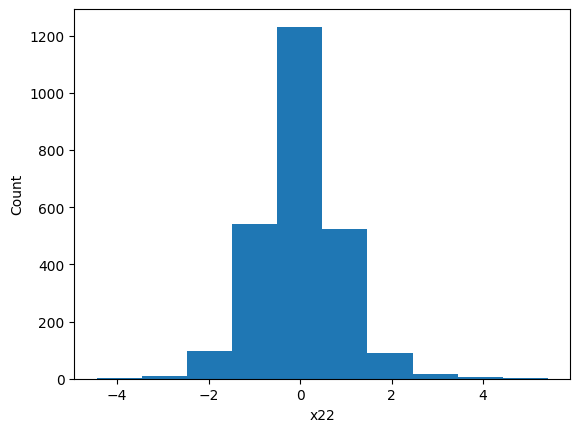

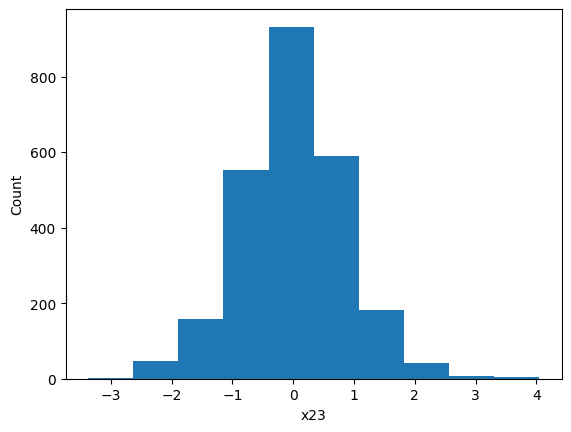

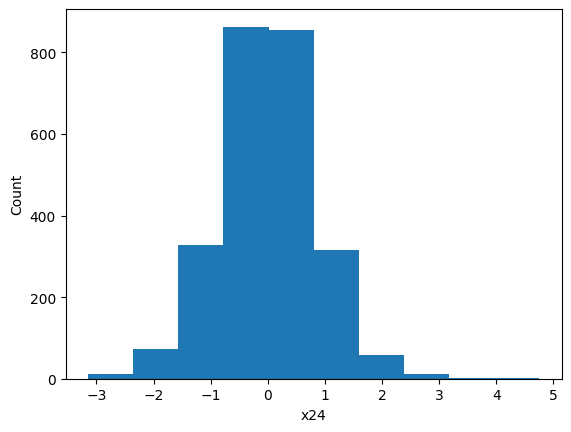

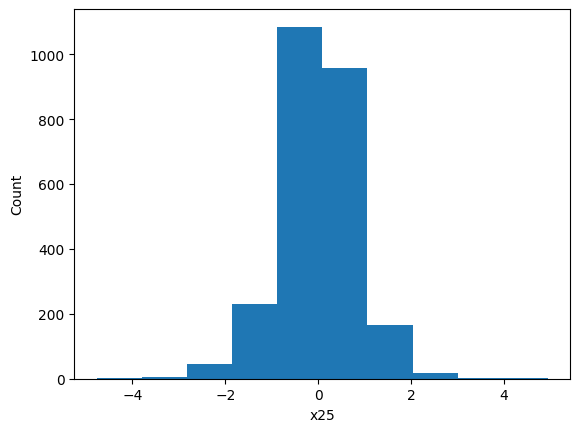

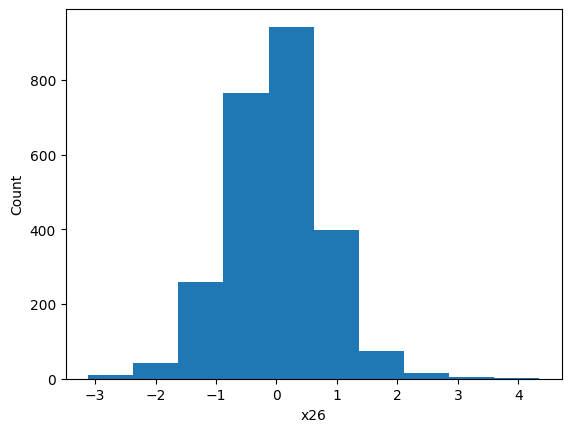

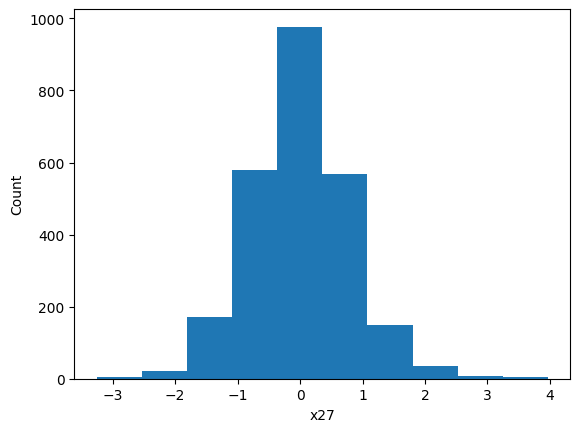

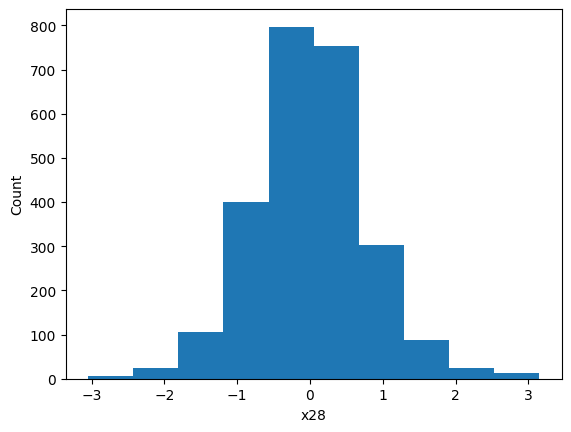

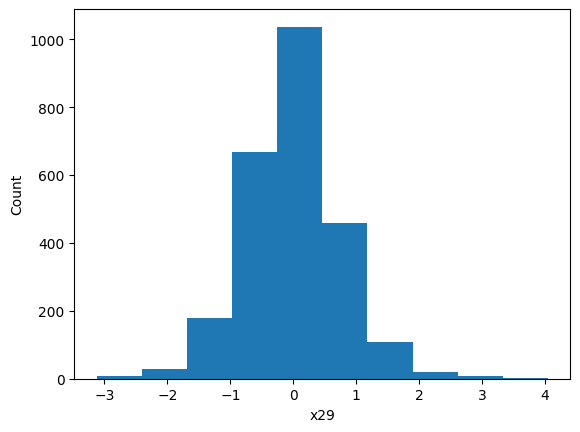

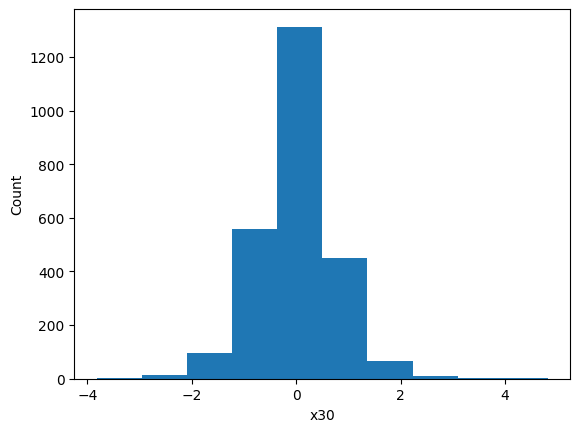

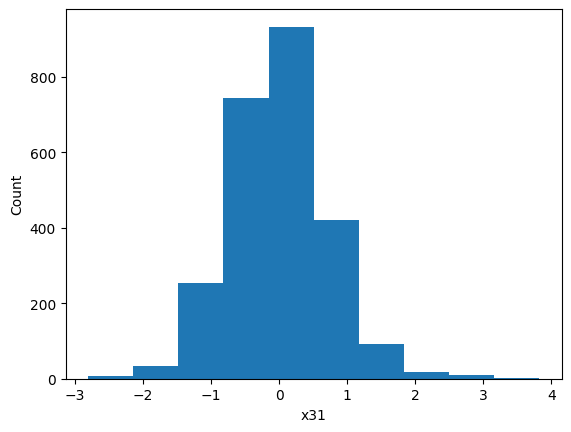

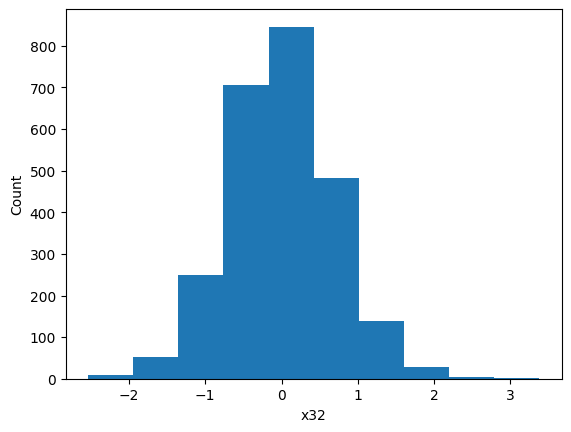

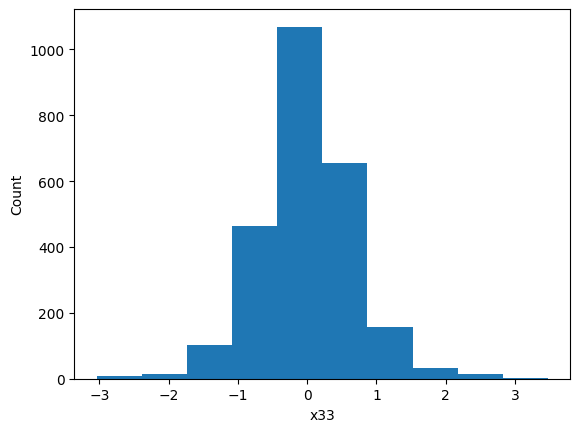

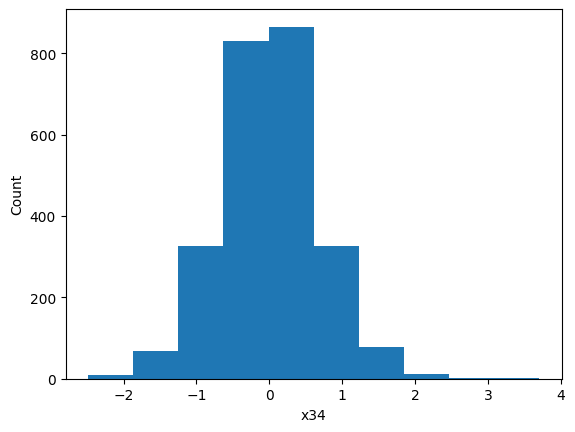

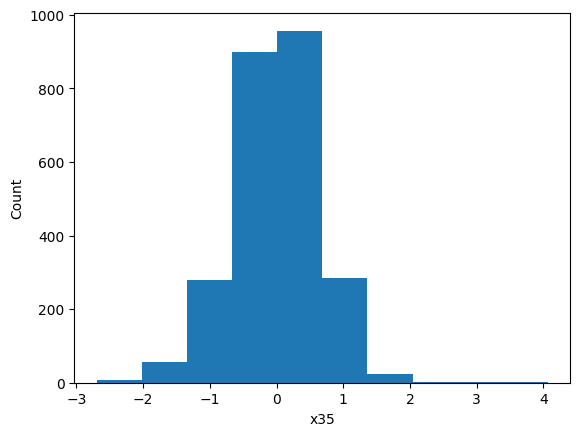

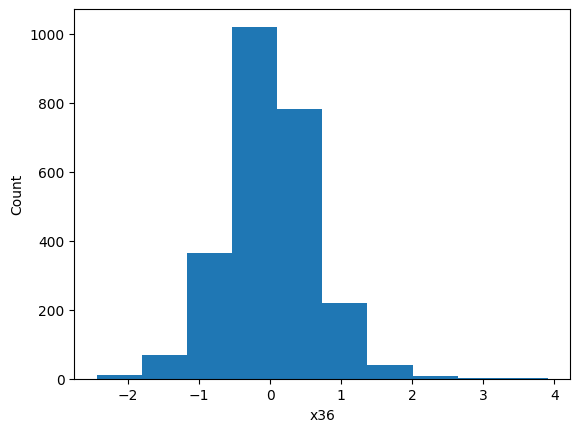

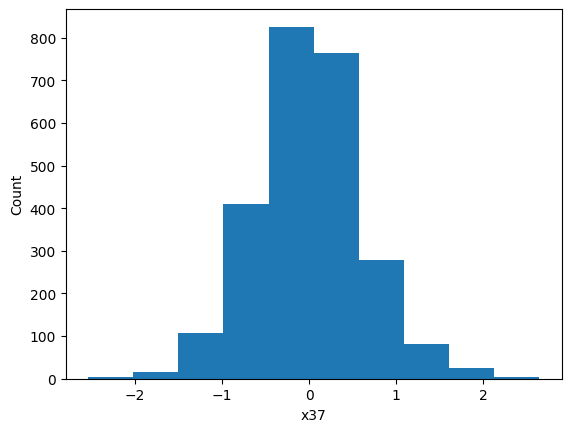

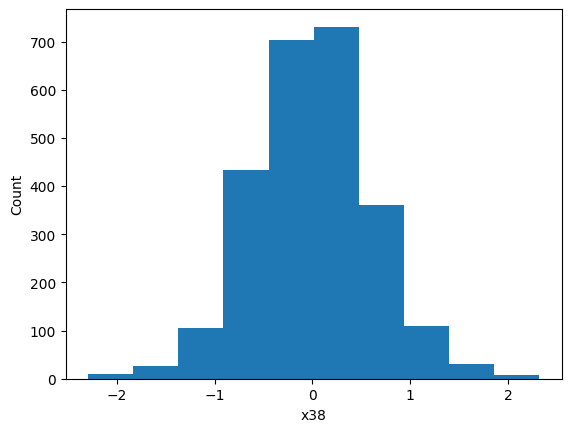

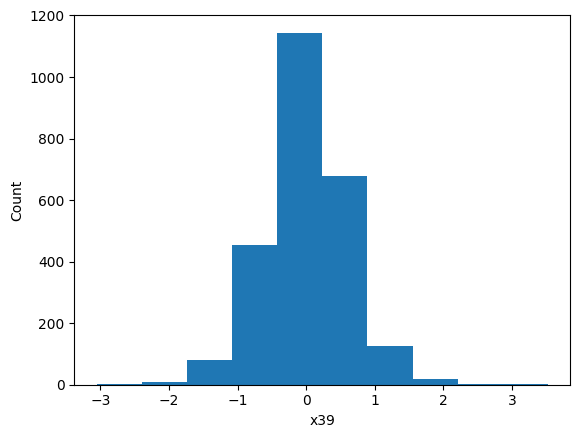

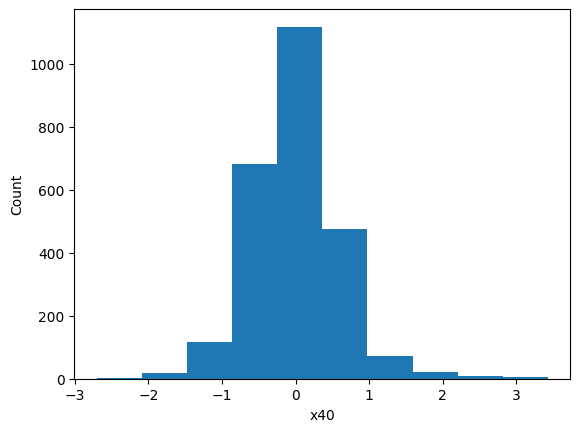

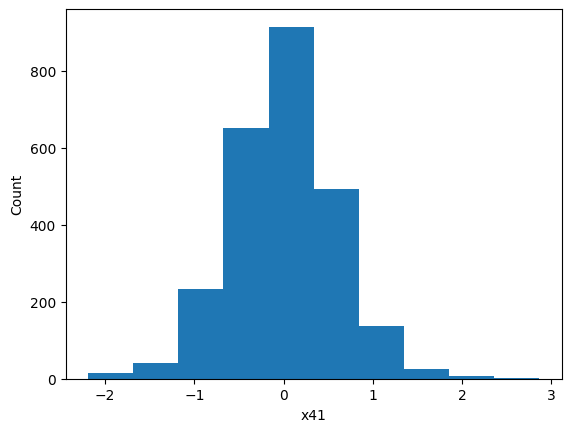

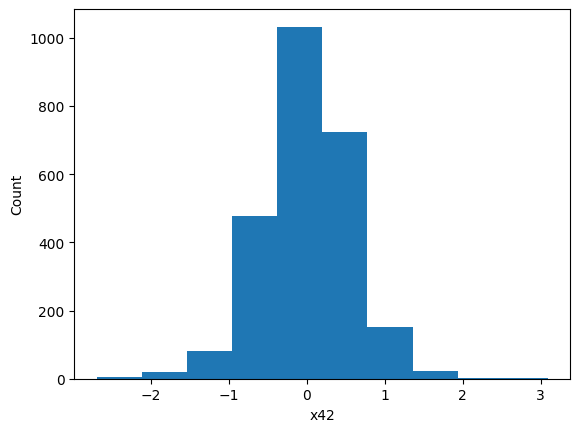

In [15]:
#View Distributions of variables in final_df

import matplotlib.pyplot as plt

for col in final_df.iloc[:, 6:].columns:
    fig, ax = plt.subplots()
    ax.hist(final_df.iloc[:, 6:][col])
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.show()

In [16]:
final_df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'Born', 'Squad', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42'],
      dtype='object')

In [17]:
final_df.describe()

Age         Born            x1            x2            x3  \
count  2516.000000  2516.000000  2.516000e+03  2.516000e+03  2.516000e+03   
mean     25.562401  1997.437599 -4.518555e-17  1.129639e-17 -5.648193e-18   
std       4.122730     4.122730  5.366603e+00  4.286774e+00  2.646940e+00   
min      16.000000  1982.000000 -1.210434e+01 -1.198255e+01 -9.085409e+00   
25%      22.000000  1995.000000 -5.043225e+00 -3.266431e+00 -1.814219e+00   
50%      25.000000  1998.000000  8.675840e-01 -2.264493e-01  3.750399e-02   
75%      28.000000  2001.000000  4.222562e+00  2.688771e+00  1.893069e+00   
max      41.000000  2007.000000  1.347610e+01  1.742622e+01  9.315658e+00   

                 x4            x5            x6            x7            x8  \
count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
mean  -4.518555e-17 -2.541687e-17  5.083374e-17  1.129639e-17  3.388916e-17   
std    2.393550e+00  1.954073e+00  1.799987e+00  1.572045e+00  1.491367e+00   
min   -8.356297e+00 -6.315895e+00 -4.875212e+00 -6.416280e+00 -4.209454e+00   
25%   -1.411693e+00 -1.289169e+00 -1.360773e+00 -9.915519e-01 -1.030465e+00   
50%   -1.680719e-01 -1.191351e-01 -2.598167e-02  1.270790e-01  2.390993e-03   
75%    1.045020e+00  1.311775e+00  1.292215e+00  1.056070e+00  9.114629e-01   
max    1.502077e+01  6.431570e+00  6.035176e+00  8.170042e+00  7.761541e+00   

                 x9           x10          x11           x12           x13  \
count  2.516000e+03  2.516000e+03  2516.000000  2.516000e+03  2.516000e+03   
mean  -1.129639e-17  5.365784e-17     0.000000 -4.942169e-17  2.824097e-18   
std    1.380147e+00  1.262571e+00     1.197784  1.119345e+00  1.108379e+00   
min   -6.499846e+00 -4.634754e+00    -4.984649 -3.594954e+00 -2.494273e+00   
25%   -8.811482e-01 -6.149970e-01    -0.623256 -7.397018e-01 -5.984507e-01   
50%   -3.402261e-02 -1.045198e-01    -0.028910 -4.899976e-02 -2.075366e-01   
75%    8.258111e-01  4.889713e-01     0.611242  7.305113e-01  2.677210e-01   
max    6.706556e+00  9.750564e+00     8.510550  5.325195e+00  1.062804e+01   

                x14           x15           x16           x17           x18  \
count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
mean   3.388916e-17  1.765060e-17  4.236145e-18  5.860001e-17  7.766266e-18   
std    1.053279e+00  1.002386e+00  9.897908e-01  9.638307e-01  9.612421e-01   
min   -5.209586e+00 -4.791908e+00 -3.791403e+00 -5.526030e+00 -5.843699e+00   
25%   -5.979645e-01 -5.394037e-01 -6.403585e-01 -5.700683e-01 -5.287174e-01   
50%    3.216048e-03 -8.035433e-02 -8.879753e-02 -2.547964e-02 -5.518313e-02   
75%    6.043071e-01  4.616405e-01  5.169406e-01  5.032084e-01  4.774990e-01   
max    5.232091e+00  9.839062e+00  6.508820e+00  5.747601e+00  7.355328e+00   

                x19           x20           x21           x22           x23  \
count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
mean   9.884339e-18 -6.354218e-18 -9.884339e-18  5.648193e-18 -1.694458e-17   
std    9.365979e-01  9.262541e-01  9.030446e-01  8.813470e-01  8.565509e-01   
min   -4.175864e+00 -3.486069e+00 -3.818307e+00 -4.439589e+00 -3.370649e+00   
25%   -5.562858e-01 -5.219900e-01 -5.542622e-01 -5.253935e-01 -5.142794e-01   
50%   -2.916645e-02 -6.835505e-02 -1.954368e-02  2.715829e-03 -3.391217e-04   
75%    5.088953e-01  3.928240e-01  5.347320e-01  4.921466e-01  5.290967e-01   
max    4.856378e+00  1.044964e+01  5.039258e+00  5.415675e+00  4.043450e+00   

                x24           x25           x26           x27           x28  \
count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
mean   2.824097e-18  4.236145e-18  3.741928e-17  3.459518e-17  1.623856e-17   
std    8.441435e-01  8.226142e-01  7.912713e-01  7.850515e-01  7.751650e-01   
min   -3.144167e+00 -4.762545e+00 -3.113714e+00 -3.253468e+00 -3.045405e+00   
25%   -5.110339e-01 -4.629745e-01 -4.688687e-01 -5.005974e-01 -4.914642e-01   
50%   -5

In [18]:
final_df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'Born', 'Squad', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42'],
      dtype='object')

In [19]:
pca_cols = final_df.columns[6:]
pca_cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42'],
      dtype='object')

# Create Flag variables for the Position of Each Player

In [20]:
final_df['FW'] = 0
final_df['MF'] = 0
final_df['DF'] = 0

for i in range(len(final_df)):
  pos = final_df.loc[i, 'Pos'].split(',')

  if len(pos) == 1:
    final_df.loc[i, pos[0]] = 3
    #final_df.loc[i, pos[0]] = 1
  else:
    for j in range(len(pos)):
      final_df.loc[i, pos[j]] = 3-j-1
      #final_df.loc[i, pos[j]] = 1

In [21]:
final_df[['Player', 'FW', 'MF', 'DF']]

Player  FW  MF  DF
0          Yunus Musah   0   3   0
1        Matheus Costa   0   0   3
2               Carlos   0   0   3
3            Leny Yoro   0   0   3
4         Steve Mounié   3   0   0
...                ...  ..  ..  ..
2511        Mats Deijl   0   0   3
2512      Lukas Nmecha   3   0   0
2513  Kacper Kozłowski   1   2   0
2514             Pablo   3   0   0
2515   Matthias Ginter   0   0   3

[2516 rows x 4 columns]

# Create a New Variable That Will Contain the Player Name and the Club(s) They Have Played For

In [22]:
final_df['Player + Squad'] = final_df['Player'] + ' in ' + final_df['Squad']

In [23]:
final_df.head()

Player Nation Pos   Age    Born     Squad        x1        x2  \
0    Yunus Musah    USA  MF  19.0  2004.0  Valencia -2.096624 -0.779190   
1  Matheus Costa    BRA  DF  27.0  1996.0  Marítimo  5.007021 -5.352972   
2         Carlos    BRA  DF  23.0  2000.0     Monza  1.242728  0.588413   
3      Leny Yoro    FRA  DF  16.0  2007.0     Lille  8.562186 -1.982651   
4   Steve Mounié    BEN  FW  27.0  1996.0     Brest -6.568223 -6.181401   

         x3        x4        x5        x6        x7        x8        x9  \
0 -1.705813 -1.453513 -0.525468 -1.566958  1.797465 -0.994591 -1.742042   
1  0.273961  0.782250 -0.559797  1.297426  0.777932  1.083990  1.439344   
2  0.302585 -0.608465 -1.606356 -3.729911 -1.835440  0.199913 -0.084669   
3  2.504227 -1.408688 -1.686237  3.424525  0.691252  0.336364 -0.521029   
4  2.971337 -0.868922  2.492013  0.843567 -3.089027  1.498772  0.748453   

        x10       x11       x12       x13       x14       x15       x16  \
0 -0.343466 -0.802635  0.546734  0.127733 -0.635752  0.341872 -0.280495   
1  0.438372  0.064656 -0.268597 -0.069564 -0.641544  3.233605  0.302586   
2 -0.534933 -0.622972 -0.357468 -0.256377 -0.132609 -0.915269 -0.110310   
3 -0.649923  0.291415 -2.025137 -0.156036  0.007019 -0.400292 -0.999379   
4 -1.943341 -4.131141  1.355268  1.171105 -1.480739  0.411263  0.064122   

        x17       x18       x19       x20       x21       x22       x23  \
0 -0.901682  0.747917  0.352113 -0.679495  1.465567  1.053208 -1.224157   
1  1.391039  2.100613  1.962151 -0.545759  0.261994  0.018678 -0.013850   
2 -0.020948  0.459226  0.206174 -0.378104  0.265345  0.580970  0.014642   
3 -0.990465  0.778281 -0.416732  0.018424  0.911786 -0.084635  0.022495   
4 -0.721269  0.288001 -1.432071 -0.602729  0.148226 -0.899199 -0.223187   

        x24       x25       x26       x27       x28       x29       x30  \
0 -0.028172  0.458018 -0.495320 -0.045236  0.674579  0.357872 -0.279417   
1 -0.148520  0.458844 -0.598145 -0.051631 -0.241116  0.359724 -0.344827   
2 -0.611108  0.375430  0.123790  0.280552  0.108589 -0.083906  1.255806   
3  0.036252 -0.703865  1.042886 -0.407012 -0.425151 -0.354143 -0.490758   
4  1.629755 -0.323112 -0.545224  0.624032 -0.792737  1.505610  0.337382   

        x31       x32       x33       x34       x35       x36       x37  \
0  0.259328 -0.465404  0.158515  1.007203 -0.354820 -0.572797  0.518402   
1 -0.448726  0.734717  0.551740 -0.120030 -0.337532 -0.417514 -0.146537   
2  0.274539  0.049747 -0.146622 -0.077868  0.256959 -0.826094  0.413455   
3  0.166440 -0.377662 -0.330032 -0.865664 -0.537173  1.320432 -1.254170   
4  0.408375 -0.309356 -0.566962  0.898180 -0.416991 -0.626887  0.594026   

        x38       x39       x40       x41       x42  FW  MF  DF  \
0  0.300534  0.616448 -0.370562 -0.074339 -0.129446   0   3   0   
1 -0.458495  0.134565 -0.205648 -0.375185 -0.517668   0   0   3   
2 -0.230279  0.174738  0.275780 -0.026512  0.074521   0   0   3   
3 -0.287602  0.984218 -0.475319 -0.508398  0.890127   0   0   3   
4 -0.516450  0.386539  0.162402 -0.024868 -0.173022   3   0   0   

              Player + Squad  
0    Yunus Musah in Valencia  
1  Matheus Costa in Marítimo  
2            Carlos in Monza  
3         Leny Yoro in Lille  
4      Steve Mounié in Brest

# Identify the Top 10 Players for a Given Player Using Self Organizing Map With Cosine Distance as the Distance Metric for Non-Positional Data and Bray-Curtis Distance as Distance Metric for Positional Data

In [24]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=d70868d468684da1d72b763d97c593fa8ab90695d5908fe97291b82ffa80ee43
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [25]:
final_df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'Born', 'Squad', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'FW', 'MF',
       'DF', 'Player + Squad'],
      dtype='object')

In [26]:
import numpy as np
from minisom import MiniSom
from math import sqrt

final_df_matrix = final_df.iloc[:, 6:-1].to_numpy()

In [27]:
grid_size = (2, 3)
input_len = final_df_matrix.shape[1]

final_df_matrix.shape

(2516, 45)

In [28]:
final_df_matrix

array([[-2.09662422, -0.77918979, -1.70581307, ...,  0.        ,
         3.        ,  0.        ],
       [ 5.00702068, -5.35297198,  0.27396144, ...,  0.        ,
         0.        ,  3.        ],
       [ 1.24272808,  0.58841291,  0.30258478, ...,  0.        ,
         0.        ,  3.        ],
       ...,
       [-5.12108796,  2.82865971, -1.15037883, ...,  1.        ,
         2.        ,  0.        ],
       [-6.12361955, -4.13336634, -2.98079744, ...,  3.        ,
         0.        ,  0.        ],
       [ 6.58789527, -2.80532603,  4.048215  , ...,  0.        ,
         0.        ,  3.        ]])

In [29]:
grid_size

(2, 3)

In [30]:
final_df[['FW', 'DF', 'MF']].value_counts().reset_index()

FW  DF  MF    0
0   0   3   0  896
1   0   0   3  559
2   3   0   0  330
3   2   0   1  309
4   1   0   2  214
5   0   2   1  108
6   0   1   2   56
7   1   2   0   29
8   2   1   0   15

In [31]:
#Initialize and train the SOM
from scipy.spatial.distance import correlation, braycurtis, cosine
import numpy as np

def custom_dist(x, matrix):
    A = np.zeros((2, 3))
    #print(matrix.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            m = matrix[i][j]
            A[i][j] = braycurtis(x[-3:], m[-3:]) + cosine(x[:-3], m[:-3])
    return A

som = MiniSom(grid_size[0], grid_size[1], input_len, sigma=grid_size[0]/2, learning_rate=0.5, random_seed = 10, activation_distance = custom_dist)
som.random_weights_init(final_df_matrix)
som.train(data = final_df_matrix, num_iteration = 500, random_order = True, use_epochs = True, verbose = True)

 [ 1258000 / 1258000 ] 100% - 0:00:00 left 
 quantization error: 7.627896347295073


In [32]:
som.topographic_error(final_df_matrix)

0.15461049284578696

In [33]:
len(som.win_map(final_df_matrix).keys())

6

In [34]:
# Obtain the cluster labels for each data point
cluster_labels = np.zeros(final_df_matrix.shape[0])
for i, x in enumerate(final_df_matrix):
    winner = som.winner(x)
    cluster_labels[i] = winner[0] * grid_size[1] + winner[1]

In [35]:
len(cluster_labels)

2516

In [36]:
cluster_labels

array([4., 0., 0., ..., 2., 1., 0.])

In [37]:
final_df['Cluster'] = cluster_labels

In [38]:
final_df['Cluster'].value_counts().reset_index()

index  Cluster
0    0.0      741
1    1.0      483
2    2.0      404
3    4.0      321
4    3.0      297
5    5.0      270

In [39]:
final_df[['Cluster', 'Pos']].value_counts().reset_index()

Cluster    Pos    0
0       0.0     DF  708
1       1.0     FW  310
2       4.0     MF  292
3       5.0     MF  248
4       2.0  MF,FW  196
5       3.0     DF  188
6       1.0  FW,MF  157
7       2.0  FW,MF  151
8       3.0  DF,MF   72
9       0.0  DF,MF   32
10      3.0  DF,FW   27
11      4.0  MF,DF   22
12      2.0     FW   20
13      2.0     MF   19
14      5.0  MF,DF   15
15      2.0  MF,DF   11
16      3.0  MF,DF    8
17      1.0  FW,DF    8
18      4.0  MF,FW    7
19      5.0  MF,FW    6
20      2.0  FW,DF    5
21      1.0  MF,FW    5
22      2.0  DF,MF    2
23      3.0  FW,DF    2
24      1.0  DF,MF    2
25      0.0  DF,FW    1
26      5.0  FW,MF    1
27      1.0  DF,FW    1

In [40]:
final_df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'Born', 'Squad', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'FW', 'MF',
       'DF', 'Player + Squad', 'Cluster'],
      dtype='object')

# Create a Distance Matrix Within Each Cluster

In [41]:
from scipy.spatial.distance import correlation, cosine, braycurtis
from tqdm import tqdm
import numpy as np

def cluster_distance_matrix(cluster):
  X = final_df.loc[final_df['Cluster'] == cluster]
  X_arr = X.iloc[:, 6:-2].to_numpy()
  distance_matrix = []

  for i in tqdm(range(len(X))):
    row = []
    for j in range(len(X)):
      row.append(cosine(X_arr[i, :-3], X_arr[j, :-3]) + braycurtis(X_arr[i, -3:], X_arr[j, -3:]) )
    distance_matrix.append(row)

  distance_matrix = np.asarray(distance_matrix)
  return distance_matrix

In [42]:
#Create a dictionary where every key is the name of a cluster and every value is the distance matrix of that cluster

distance_matrix_dict = {}

for i in range(len(set(final_df['Cluster']))):
  distance_matrix_dict[i] = cluster_distance_matrix(i)

100%|██████████| 270/270 [00:03<00:00, 72.93it/s]


# Get Recommendations

In [43]:
import operator
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine, braycurtis

def top_ten(p):

  player_index = final_df.loc[final_df['Player + Squad'] == p].index[0]
  player_pos = final_df.loc[player_index, 'Pos'].split(',')
  player_cluster = final_df.loc[player_index, 'Cluster']

  X = final_df.loc[final_df['Cluster'] == player_cluster].reset_index()
  X.drop(columns = ['index'], inplace = True)

  player_index = X.loc[X['Player + Squad'] == p].index[0]

  X1 = X.iloc[:, 6:-2]

  print(X1.shape)

  #correlation_matrix = np.corrcoef(X1)

  #distance_matrix = 1 - correlation_matrix
  distance_matrix = distance_matrix_dict[player_cluster]

  cluster_indices = distance_matrix.shape[0]

  players_dict = {}

  for i in range(cluster_indices):
    key = X.loc[i, 'Player + Squad']
    value = distance_matrix[player_index, i]
    players_dict[key] = value


  sorted_players_dict = sorted(players_dict.items(), key=operator.itemgetter(1))

  top_ten_players = []

  for i in sorted_players_dict[1:11]:
    top_ten_players.append(i[0])

  print(sorted_players_dict)


  return top_ten_players

In [44]:
top_ten("Lionel Messi in Paris S-G")

(404, 45)
[('Lionel Messi in Paris S-G', 0.0), ('Antoine Griezmann in Atlético Madrid', 0.20963930404648257), ('Marco Asensio in Real Madrid', 0.224638012462126), ('Florian Wirtz in Leverkusen', 0.23186208867321956), ('David Neres in Benfica', 0.24999843417340117), ('Sergio Canales in Betis', 0.2630312856638374), ('Marcus Edwards in Sporting CP', 0.2678061881292487), ('Leandro Trossard in Arsenal + Brighton', 0.2740293606018691), ('Riyad Mahrez in Manchester City', 0.284405541876003), ('Ángel Di María in Juventus', 0.28862325180618065), ('Luis Muriel in Atalanta', 0.29402467722437664), ('Adam Ounas in Lille + Napoli', 0.31300636679504223), ('Dušan Tadić in Ajax', 0.3279560257573212), ('Edon Zhegrova in Lille', 0.330782047303822), ('Steven Bergwijn in Ajax', 0.34639984040829375), ('Thomas Müller in Bayern Munich', 0.34652064920604764), ('Kingsley Coman in Bayern Munich', 0.3477613903856903), ('Badredine Bouanani in Nice', 0.3524433269249866), ('Arber Zeneli in Reims', 0.3550118388222021

['Antoine Griezmann in Atlético Madrid',
 'Marco Asensio in Real Madrid',
 'Florian Wirtz in Leverkusen',
 'David Neres in Benfica',
 'Sergio Canales in Betis',
 'Marcus Edwards in Sporting CP',
 'Leandro Trossard in Arsenal + Brighton',
 'Riyad Mahrez in Manchester City',
 'Ángel Di María in Juventus',
 'Luis Muriel in Atalanta']

In [45]:
top_ten("Kylian Mbappé in Paris S-G")

(483, 45)
[('Kylian Mbappé in Paris S-G', 0.0), ('Mohamed Salah in Liverpool', 0.13157756891677752), ('Donyell Malen in Dortmund', 0.16832741233122606), ('Martinelli in Arsenal', 0.17836230468250835), ('Ansu Fati in Barcelona', 0.18455908642222807), ('Antony in Manchester Utd + Ajax', 0.19721337607334222), ('Vinicius Júnior in Real Madrid', 0.20187981163122914), ('Khvicha Kvaratskhelia in Napoli', 0.20646550245656126), ('Marcus Rashford in Manchester Utd', 0.22047482840015575), ('Karim Benzema in Real Madrid', 0.2230143918780224), ('Gerard Moreno in Villarreal', 0.22528061417356837), ('Randal Kolo Muani in Eint Frankfurt', 0.24749107301992324), ('Igor Paixão in Feyenoord', 0.25109158674638365), ('Iñaki Williams in Athletic Club', 0.2683474152863985), ('Robert Lewandowski in Barcelona', 0.27254554248273355), ('Miguel Almirón in Newcastle Utd', 0.2780436320123626), ('Riccardo Saponara in Fiorentina', 0.2832170391204456), ('Vangelis Pavlidis in AZ Alkmaar', 0.28661186012872697), ('Wissam 

['Mohamed Salah in Liverpool',
 'Donyell Malen in Dortmund',
 'Martinelli in Arsenal',
 'Ansu Fati in Barcelona',
 'Antony in Manchester Utd + Ajax',
 'Vinicius Júnior in Real Madrid',
 'Khvicha Kvaratskhelia in Napoli',
 'Marcus Rashford in Manchester Utd',
 'Karim Benzema in Real Madrid',
 'Gerard Moreno in Villarreal']

In [46]:
top_ten('Virgil van Dijk in Liverpool')

(741, 45)
[('Virgil van Dijk in Liverpool', 0.0), ('Kim Min-jae in Napoli', 0.044461207613037845), ('Amir Rrahmani in Napoli', 0.045408811770325075), ('Lewis Dunk in Brighton', 0.05109242925175572), ('Thiago Silva in Chelsea', 0.06082722881198943), ('Matthijs de Ligt in Bayern Munich', 0.06192522176093063), ('Willi Orban in RB Leipzig', 0.0647525167008538), ('José Fonte in Lille', 0.06675493604061722), ('Sergio Ramos in Paris S-G', 0.07019277478118857), ('Joško Gvardiol in RB Leipzig', 0.0702756381477232), ('Iván Marcano in Porto', 0.07320226992352918), ('Eric Dier in Tottenham', 0.07558973995660112), ('Rúben Dias in Manchester City', 0.07881791930948345), ('Sebastián Coates in Sporting CP', 0.07975031107141617), ('André Ramalho in PSV Eindhoven', 0.08111904432856043), ('Benoît Badiashile in Chelsea + Monaco', 0.08352396482411883), ('Dante in Nice', 0.0880735551748526), ('Marquinhos in Paris S-G', 0.09164499346714461), ("Nico Elvedi in M'Gladbach", 0.09597732082978305), ('Niklas Süle i

['Kim Min-jae in Napoli',
 'Amir Rrahmani in Napoli',
 'Lewis Dunk in Brighton',
 'Thiago Silva in Chelsea',
 'Matthijs de Ligt in Bayern Munich',
 'Willi Orban in RB Leipzig',
 'José Fonte in Lille',
 'Sergio Ramos in Paris S-G',
 'Joško Gvardiol in RB Leipzig',
 'Iván Marcano in Porto']

In [47]:
top_ten('Kyle Walker in Manchester City')

(741, 45)
[('Kyle Walker in Manchester City', 0.0), ('Nathan Aké in Manchester City', 0.06708972410660308), ('Matheus Reis in Sporting CP', 0.10370013736992423), ('Manuel Akanji in Manchester City', 0.1150435699776341), ('Facundo Medina in Lens', 0.11661497280765631), ('Aymeric Laporte in Manchester City', 0.11932646946762326), ('Jules Koundé in Barcelona', 0.12500473767872156), ('Rúben Dias in Manchester City', 0.12764569646879065), ('Oleksandr Zinchenko in Arsenal', 0.13328091284714916), ('Gonçalo Inácio in Sporting CP', 0.14049094898988912), ('Marcos Alonso in Barcelona', 0.14143430025971837), ('Sergio Ramos in Paris S-G', 0.14200902706029384), ('Andreas Christensen in Barcelona', 0.14886063308704378), ('Jerry St. Juste in Sporting CP', 0.15238653015198655), ('Niklas Süle in Dortmund', 0.15269141266974362), ('Jurriën Timber in Ajax', 0.15404309007736394), ('Amir Rrahmani in Napoli', 0.16114675010487967), ('Levi Colwill in Brighton', 0.1613679073445975), ('Joško Gvardiol in RB Leipzi

['Nathan Aké in Manchester City',
 'Matheus Reis in Sporting CP',
 'Manuel Akanji in Manchester City',
 'Facundo Medina in Lens',
 'Aymeric Laporte in Manchester City',
 'Jules Koundé in Barcelona',
 'Rúben Dias in Manchester City',
 'Oleksandr Zinchenko in Arsenal',
 'Gonçalo Inácio in Sporting CP',
 'Marcos Alonso in Barcelona']

In [48]:
top_ten('Kevin De Bruyne in Manchester City')

(270, 45)
[('Kevin De Bruyne in Manchester City', 0.0), ('Piotr Zieliński in Napoli', 0.2527091695193141), ('Martin Ødegaard in Arsenal', 0.25522973268539095), ('Otávio in Porto', 0.27403267542750886), ('Christian Eriksen in Manchester Utd', 0.28231137854585997), ('Joey Veerman in PSV Eindhoven', 0.3116744989593013), ('Sergi Darder in Espanyol', 0.31589081159221577), ('Oussama Tannane in NEC Nijmegen', 0.326583717974121), ('İlkay Gündoğan in Manchester City', 0.333228634297984), ('Mario Götze in Eint Frankfurt', 0.33613523616461216), ('Luis Alberto in Lazio', 0.34812846021190813), ('Joshua Kimmich in Bayern Munich', 0.3569797235215222), ('Rodrigo De Paul in Atlético Madrid', 0.37562141140215577), ('Muhammed Saracevic Cham in Clermont Foot', 0.37692046615659114), ('Teun Koopmeiners in Atalanta', 0.3775679750207044), ('Aleix García in Girona', 0.37887940327732794), ('Mathias Jensen in Brentford', 0.3838673903270182), ('Gerard Gumbau in Elche', 0.38575502116970684), ('Orkun Kökçü in Feyen

['Piotr Zieliński in Napoli',
 'Martin Ødegaard in Arsenal',
 'Otávio in Porto',
 'Christian Eriksen in Manchester Utd',
 'Joey Veerman in PSV Eindhoven',
 'Sergi Darder in Espanyol',
 'Oussama Tannane in NEC Nijmegen',
 'İlkay Gündoğan in Manchester City',
 'Mario Götze in Eint Frankfurt',
 'Luis Alberto in Lazio']

In [49]:
top_ten("Declan Rice in West Ham")

(270, 45)
[('Declan Rice in West Ham', 0.0), ('Pierre Højbjerg in Tottenham', 0.1516729719667298), ('Jordy Clasie in AZ Alkmaar', 0.16123564638005816), ('Azor Matusiwa in Reims', 0.17244612683862692), ('Ramiz Zerrouki in Twente', 0.19718304518335095), ('Stijn Spierings in Toulouse', 0.21336378378881338), ('Almoatasem Al Musrati in Braga', 0.23056850920601824), ('Valentin Rongier in Marseille', 0.24275742578249404), ('Nemanja Matić in Roma', 0.25130556350079514), ('Pedro Chirivella in Nantes', 0.2580712749224976), ('Rodri in Manchester City', 0.2584013553705119), ('Thomas Partey in Arsenal', 0.26737437111476037), ('William Carvalho in Betis', 0.2723842485627458), ('Nicolò Rovella in Juventus + Monza', 0.2795817548080013), ('Stanislav Lobotka in Napoli', 0.2797490767842479), ('Rominigue Kouamé in Troyes', 0.2863457925608004), ('Maxime Lopez in Sassuolo', 0.2868674728006102), ('Jordan Veretout in Marseille', 0.29146805097276507), ('Baptiste Santamaria in Rennes', 0.29177938392885683), ('E

['Pierre Højbjerg in Tottenham',
 'Jordy Clasie in AZ Alkmaar',
 'Azor Matusiwa in Reims',
 'Ramiz Zerrouki in Twente',
 'Stijn Spierings in Toulouse',
 'Almoatasem Al Musrati in Braga',
 'Valentin Rongier in Marseille',
 'Nemanja Matić in Roma',
 'Pedro Chirivella in Nantes',
 'Rodri in Manchester City']

# Generate Radar Plots

In [50]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.7 MB/s eta 0:00:00


In [51]:
df['Player + Squad'] = df['Player'] + ' in ' + df['Squad']

In [52]:
#Build the Radarplot

from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

def plot_top_10(p):

  X  = df.copy()

  X['Non-PK Goals'] = X['Gls'] - X['PK']
  X['npxG+xAG'] = X['npxG_Expected'] + X['xAG_Expected']
  X['Pass Completion %'] = 100 * X['Cmp_Total'] / X['Att_Total']
  X['Blk'] = X['Sh_Blocks'] + X['Pass_Blocks']
  X.rename(columns = {'PrgC_Progression': 'PrgC', 'PrgP_Progression': 'PrgP', 'PrgR_Progression': 'PrgR', 'Tkl_Tackles':'Tkl', 'npxG_Expected':'npxG', 'xAG_Expected':'xAG', 'SCA_SCA':'SCA', 'Att_Total':'Passes Attempted'},
           inplace = True)

  params = ['Non-PK Goals', 'npxG', 'Sh_Standard', 'Ast', 'xAG', 'npxG+xAG', 'SCA', 'Passes Attempted', 'Pass Completion %', 'PrgC', 'PrgP', 'Succ_Take', 'Att Pen_Touches', 'PrgR','Int', 'Clr', 'Tkl', 'Blk', 'Won_Aerial']

  l = top_ten(p)
  low = []
  high = []

  for i in params:
    low.append(round(X[i].describe()[1], 2))
    high.append(round(X[i].describe()[-1], 2))

  lower_is_better = []

  radar = Radar(params, low, high, lower_is_better=lower_is_better, round_int=[False]*len(params), num_rings=4, ring_width=1, center_circle_radius=1)

  URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
  robotto_thin = FontManager(URL4)

  URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
  robotto_bold = FontManager(URL5)

  for j in l:
    player = list(X.loc[X['Player + Squad'] == p, params].values[0])
    suggestion = list(X.loc[X['Player + Squad'] == j, params].values[0])

    fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

    radar.setup_axis(ax=axs['radar'])  # format axis as a radar
    rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#FFD700', edgecolor='#fc5f5f')
    radar_output = radar.draw_radar_compare(player, suggestion, ax=axs['radar'], kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6}, kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})

    radar_poly, radar_poly2, vertices1, vertices2 = radar_output

    range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=10, fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15, fontproperties=robotto_thin.prop)

    lines = radar.spoke(ax=axs['radar'], color='#a6a4a1', linestyle='--', zorder=2)

    axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1], c='#00f2c1', edgecolors='#6d6c6d', marker='.', s=150, zorder=2)
    axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1], c='#d80499', edgecolors='#6d6c6d', marker='.', s=150, zorder=2)

    title1_text = axs['title'].text(0.01, 0.65, p, fontsize=15, color='#01c49d', fontproperties=robotto_bold.prop, ha='left', va='center')
    title3_text = axs['title'].text(0.99, 0.65, j, fontsize=15, fontproperties=robotto_bold.prop, ha='right', va='center', color='#d80499')

(270, 45)
[('Luka Modrić in Real Madrid', 0.0), ('André Horta in Braga', 0.1548426664999928), ('Frenkie de Jong in Barcelona', 0.1674083572850995), ('Orkun Kökçü in Feyenoord', 0.17624230023458498), ('Luis Alberto in Lazio', 0.1817919882451563), ('Toni Kroos in Real Madrid', 0.18856601740359247), ('Tom Cairney in Fulham', 0.20645134571103385), ('Enzo Fernández in Chelsea + Benfica', 0.20906615329266987), ('Pedri in Barcelona', 0.22953729472164652), ('Christian Eriksen in Manchester Utd', 0.23444471975597803), ('Dani Ceballos in Real Madrid', 0.2385758906414579), ('Rodrigo De Paul in Atlético Madrid', 0.24177900174201739), ('Corentin Tolisso in Lyon', 0.24398308309194405), ('Kenneth Taylor in Ajax', 0.245375632223233), ('Piotr Zieliński in Napoli', 0.252900032965264), ('Marcelo Brozović in Inter', 0.2543026333861871), ('Stefano Sensi in Monza', 0.25530644246644474), ('Ivan Rakitić in Sevilla', 0.25845286196208217), ('Joey Veerman in PSV Eindhoven', 0.26655601292622033), ('Angel Gomes in

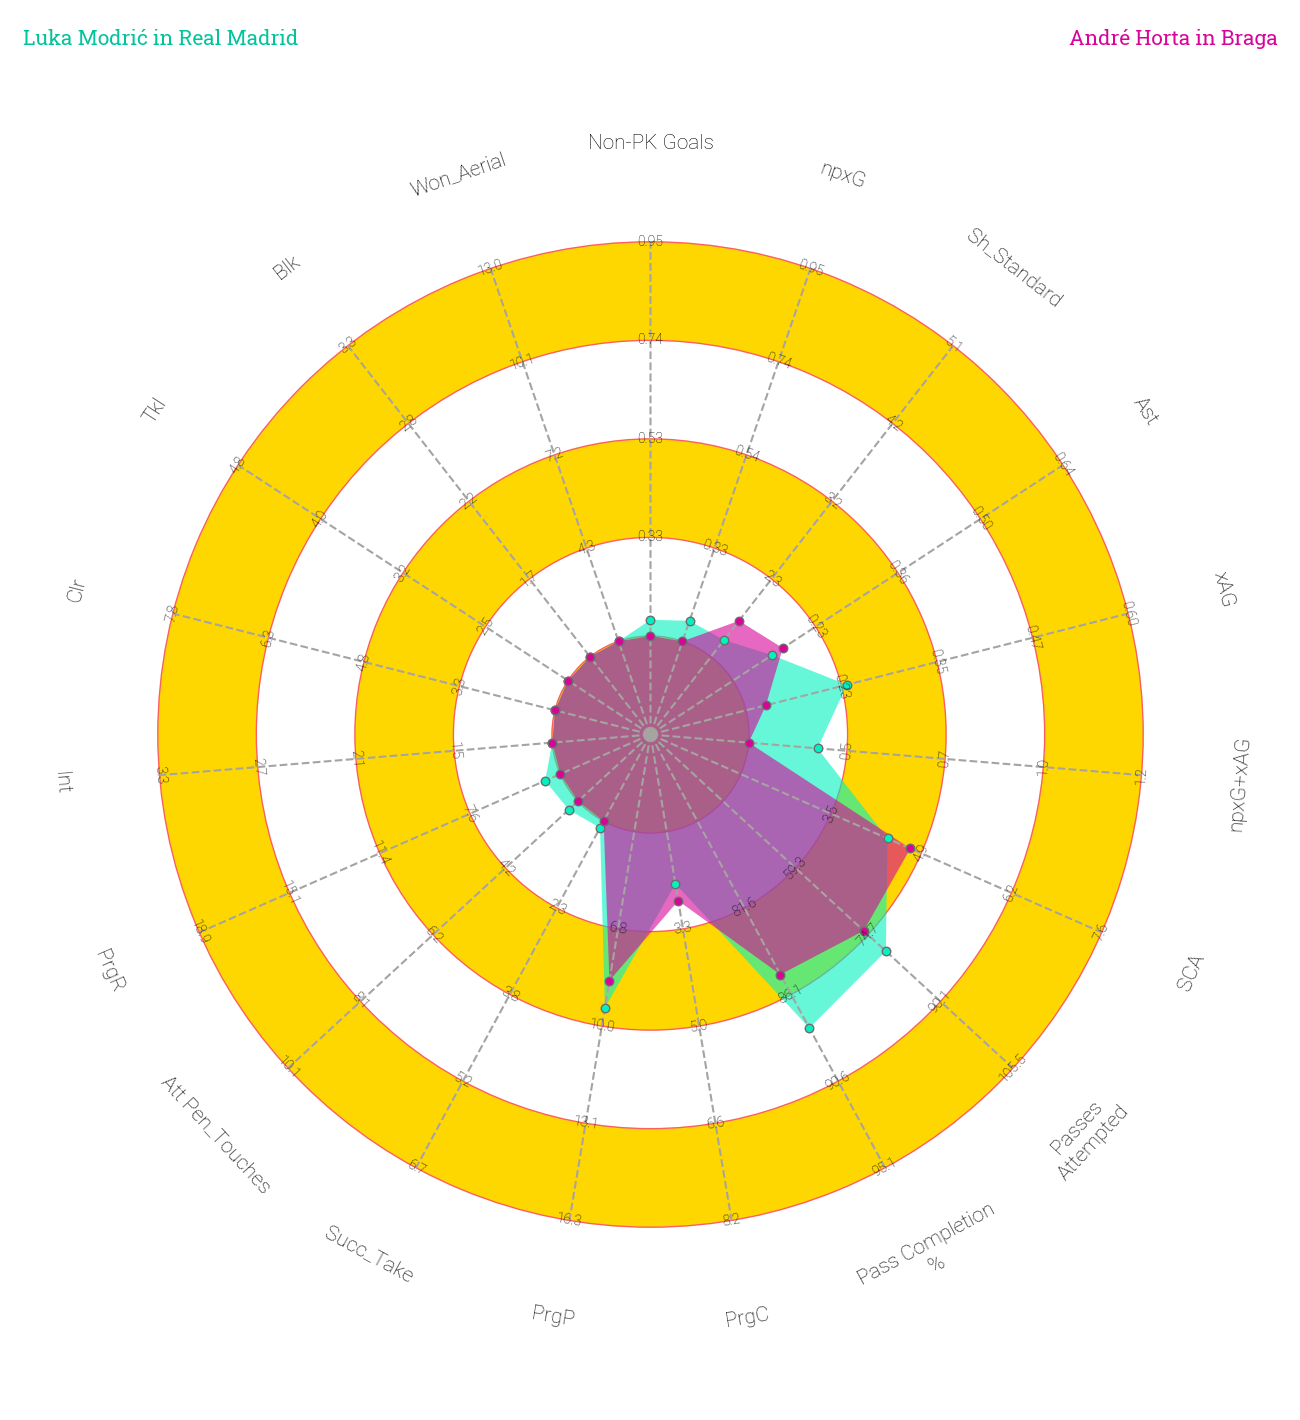

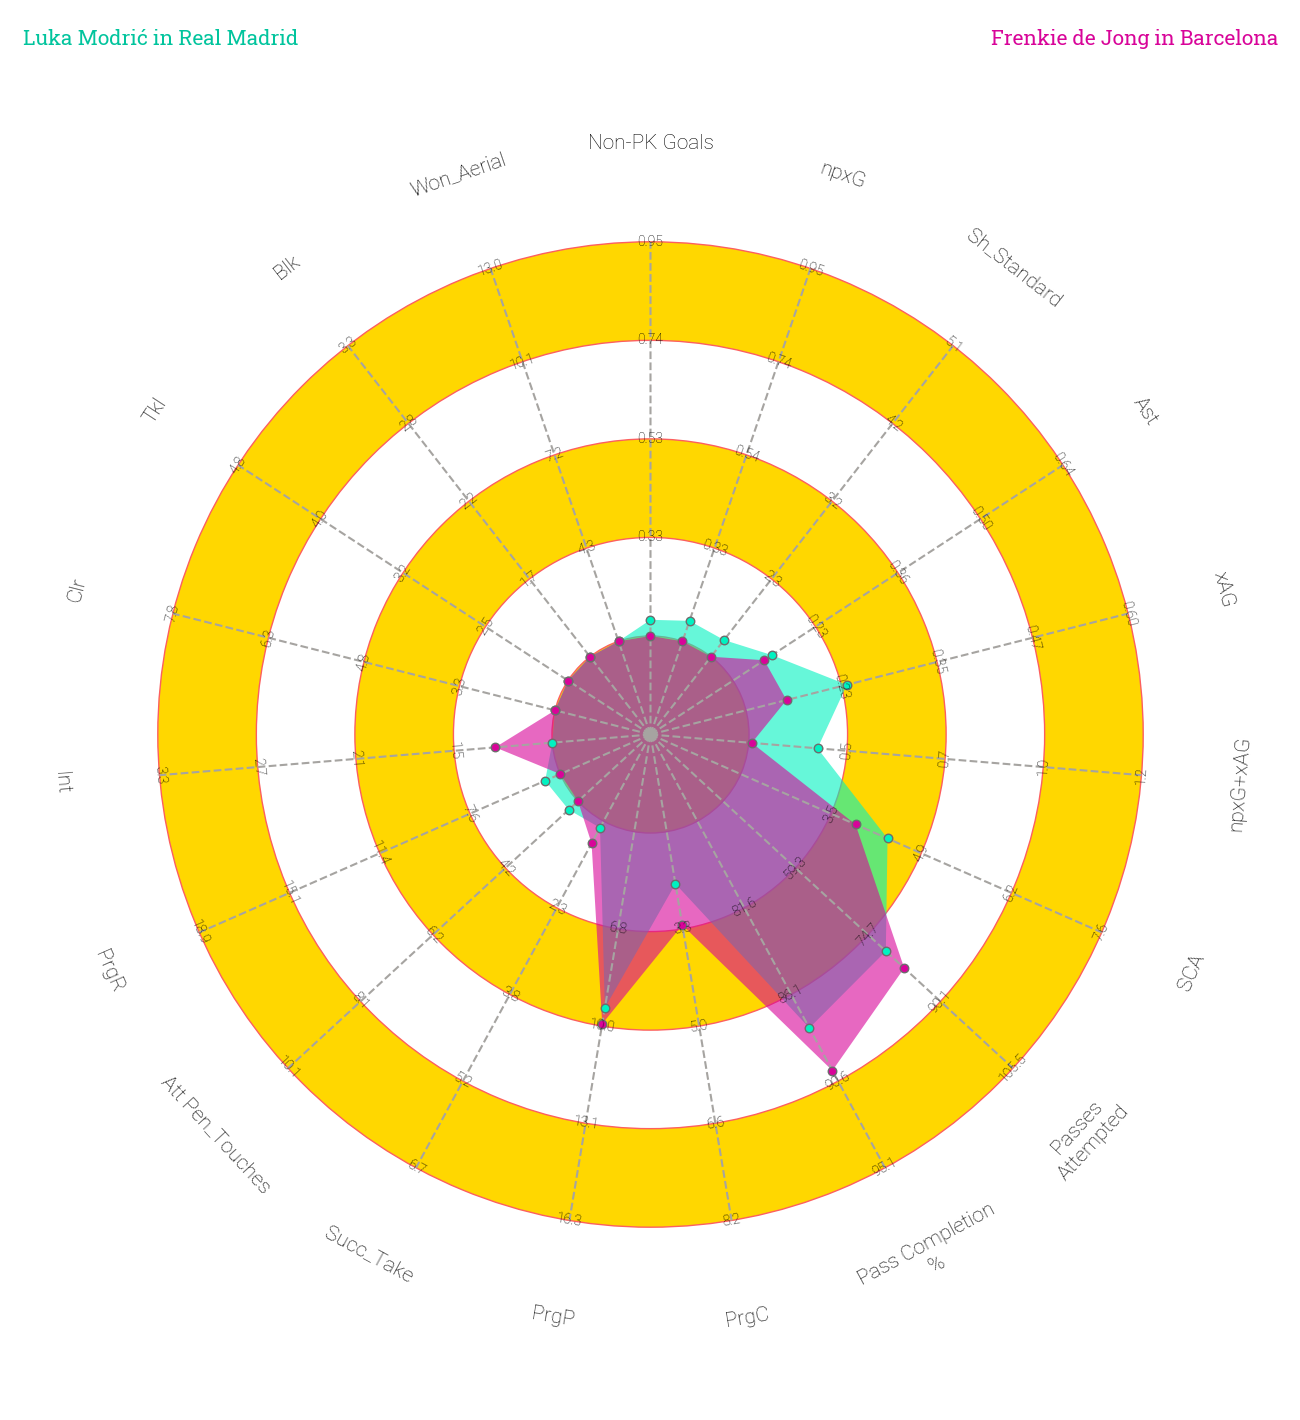

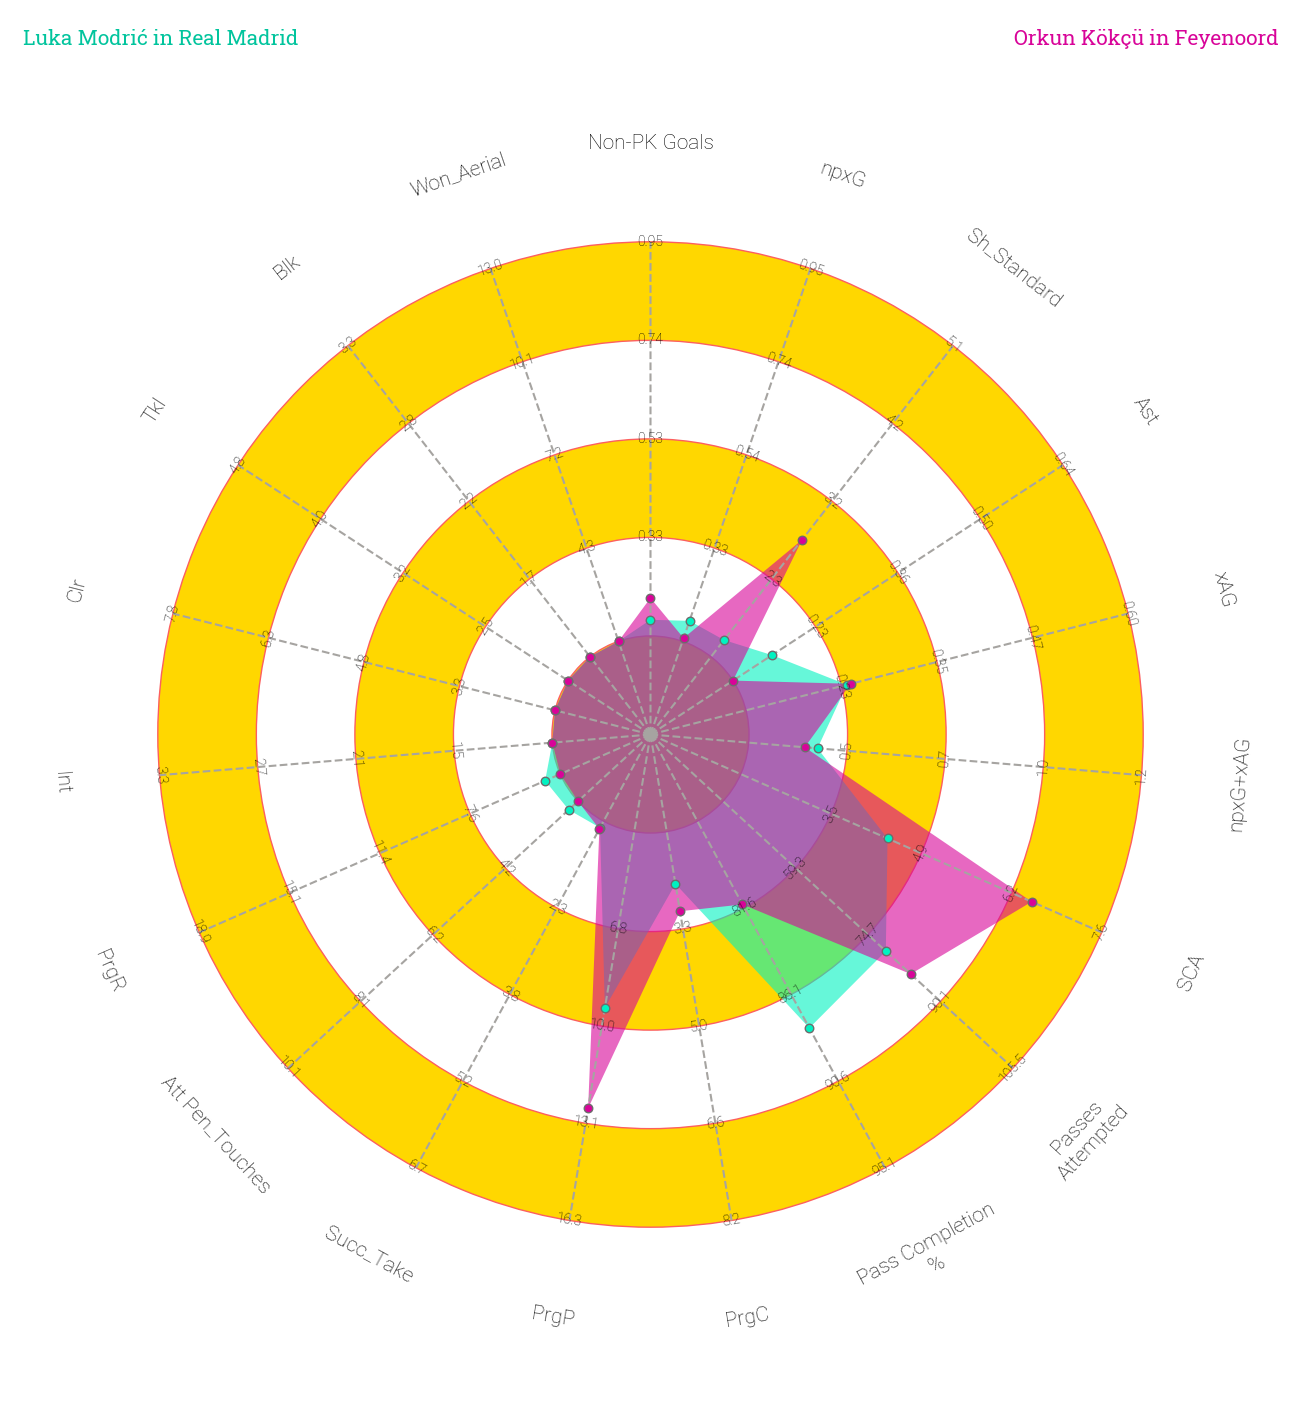

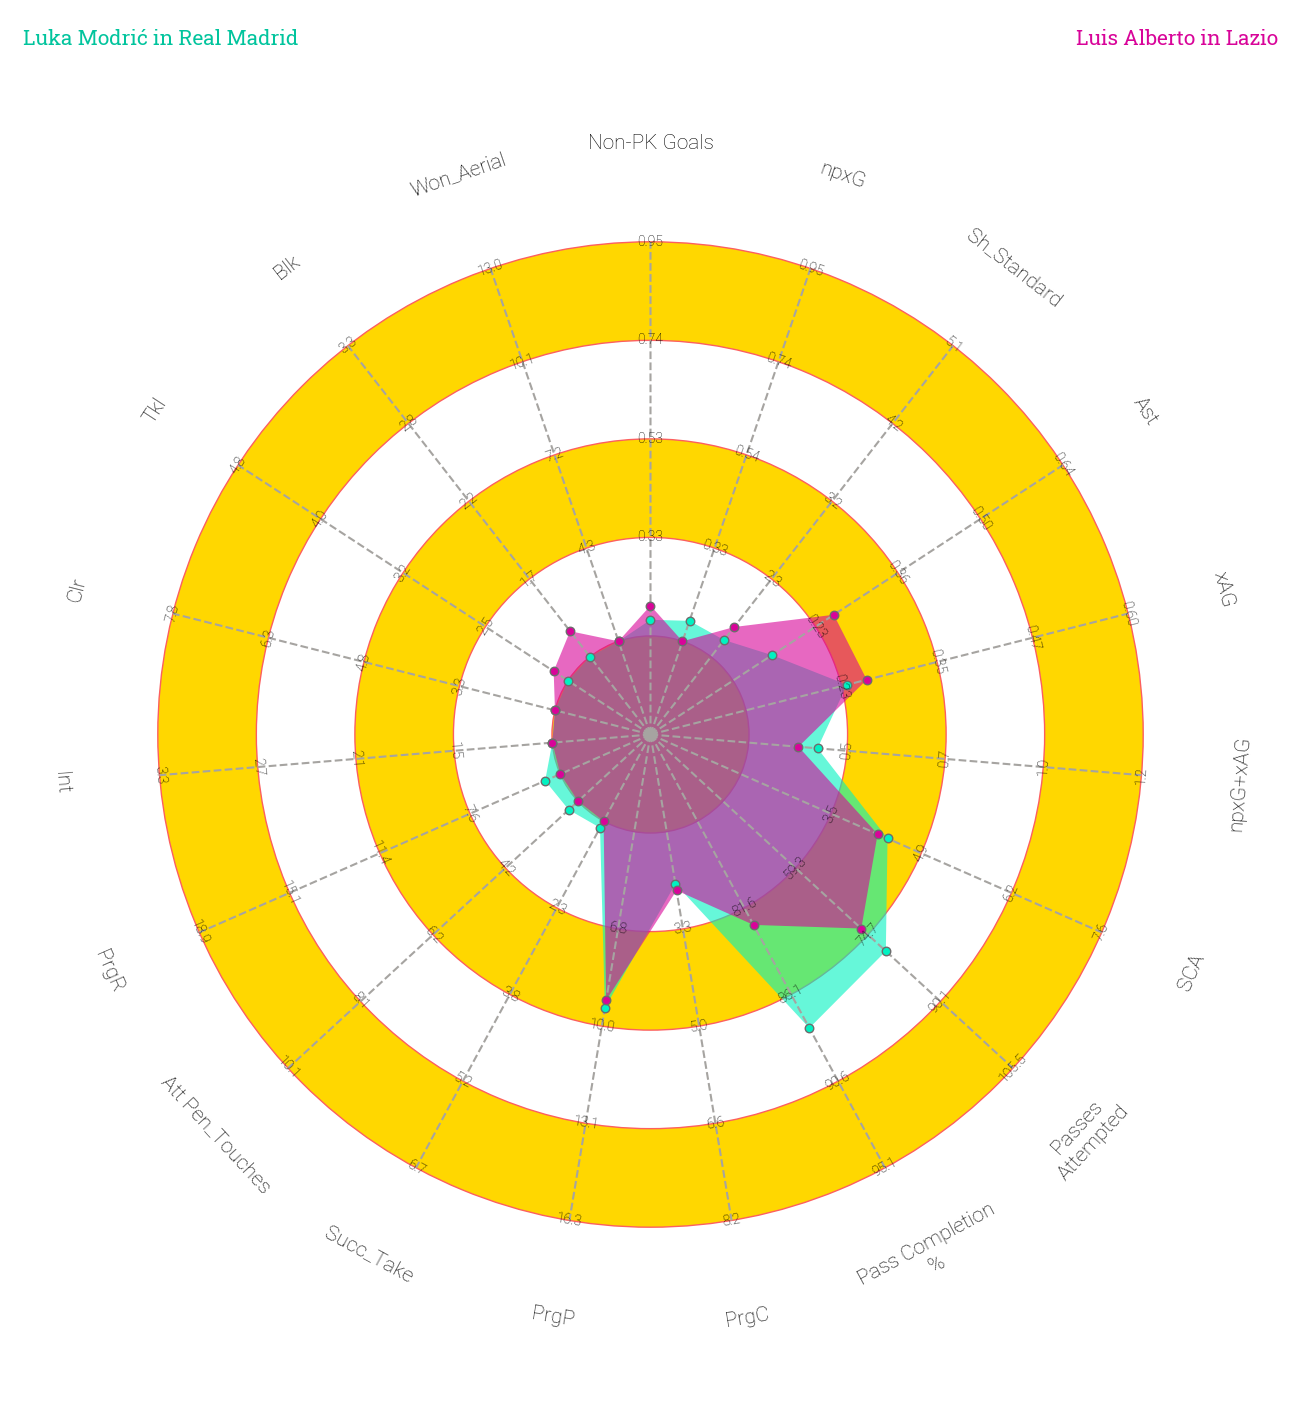

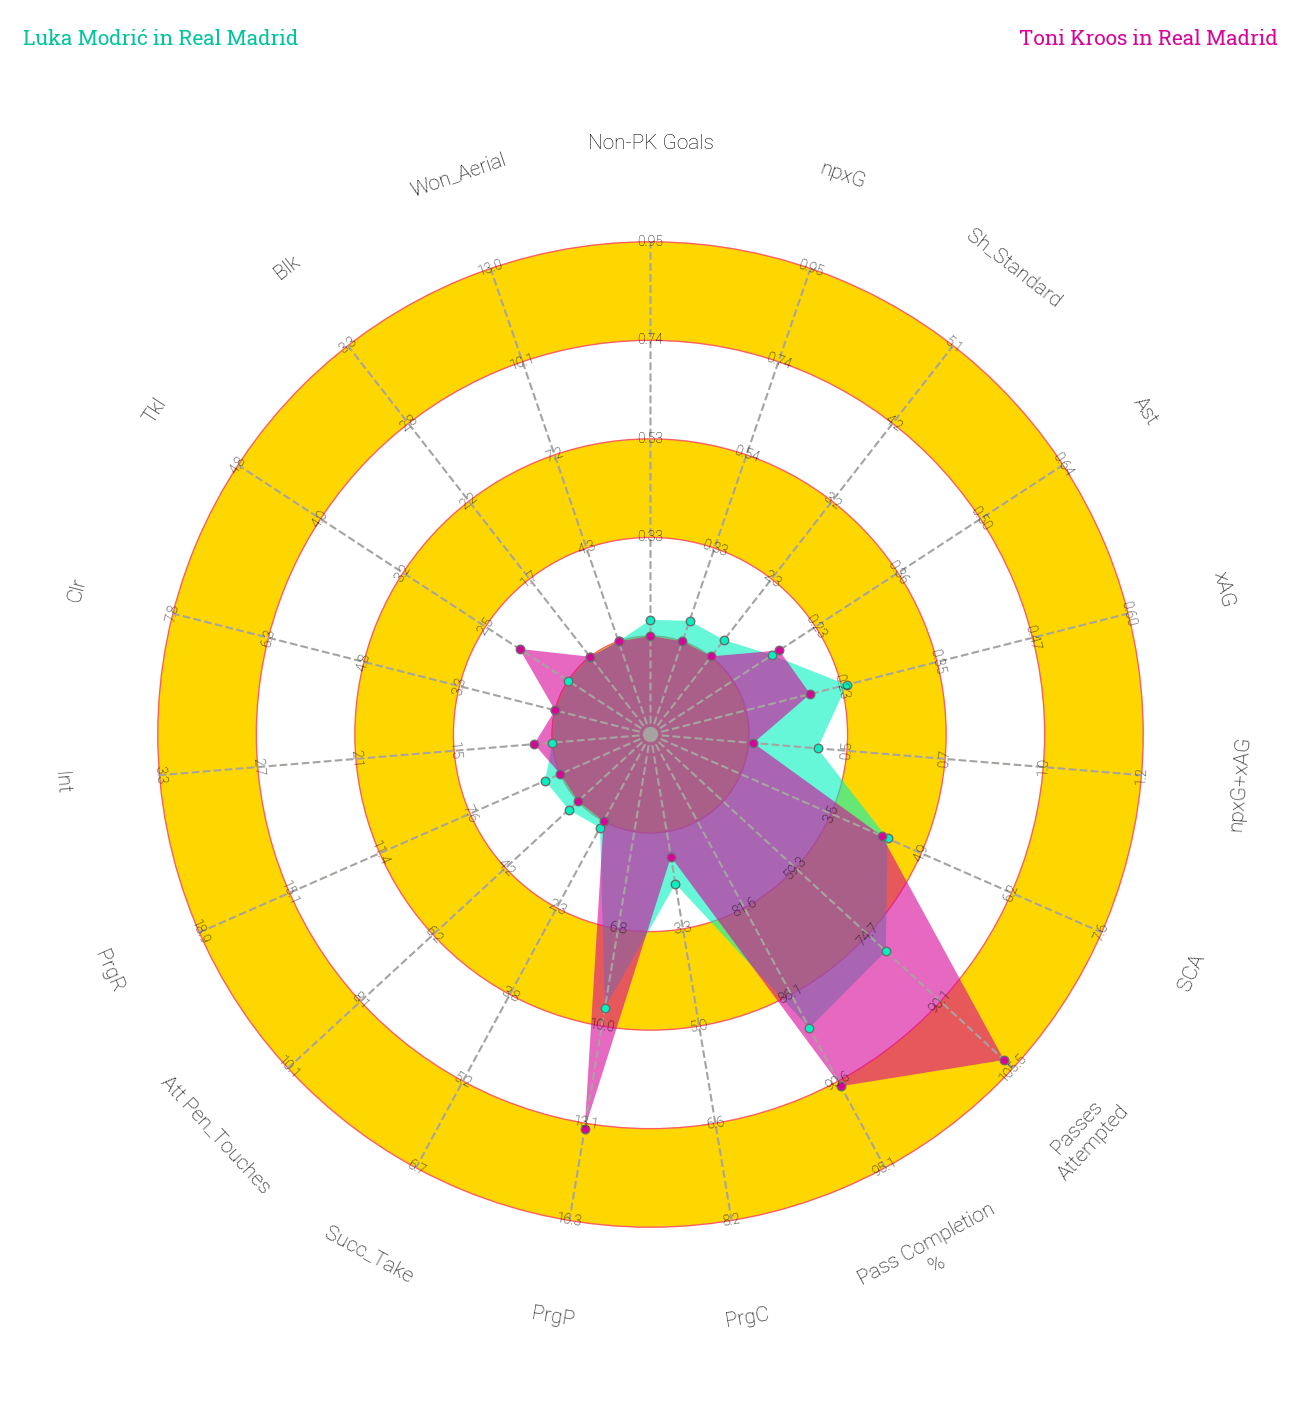

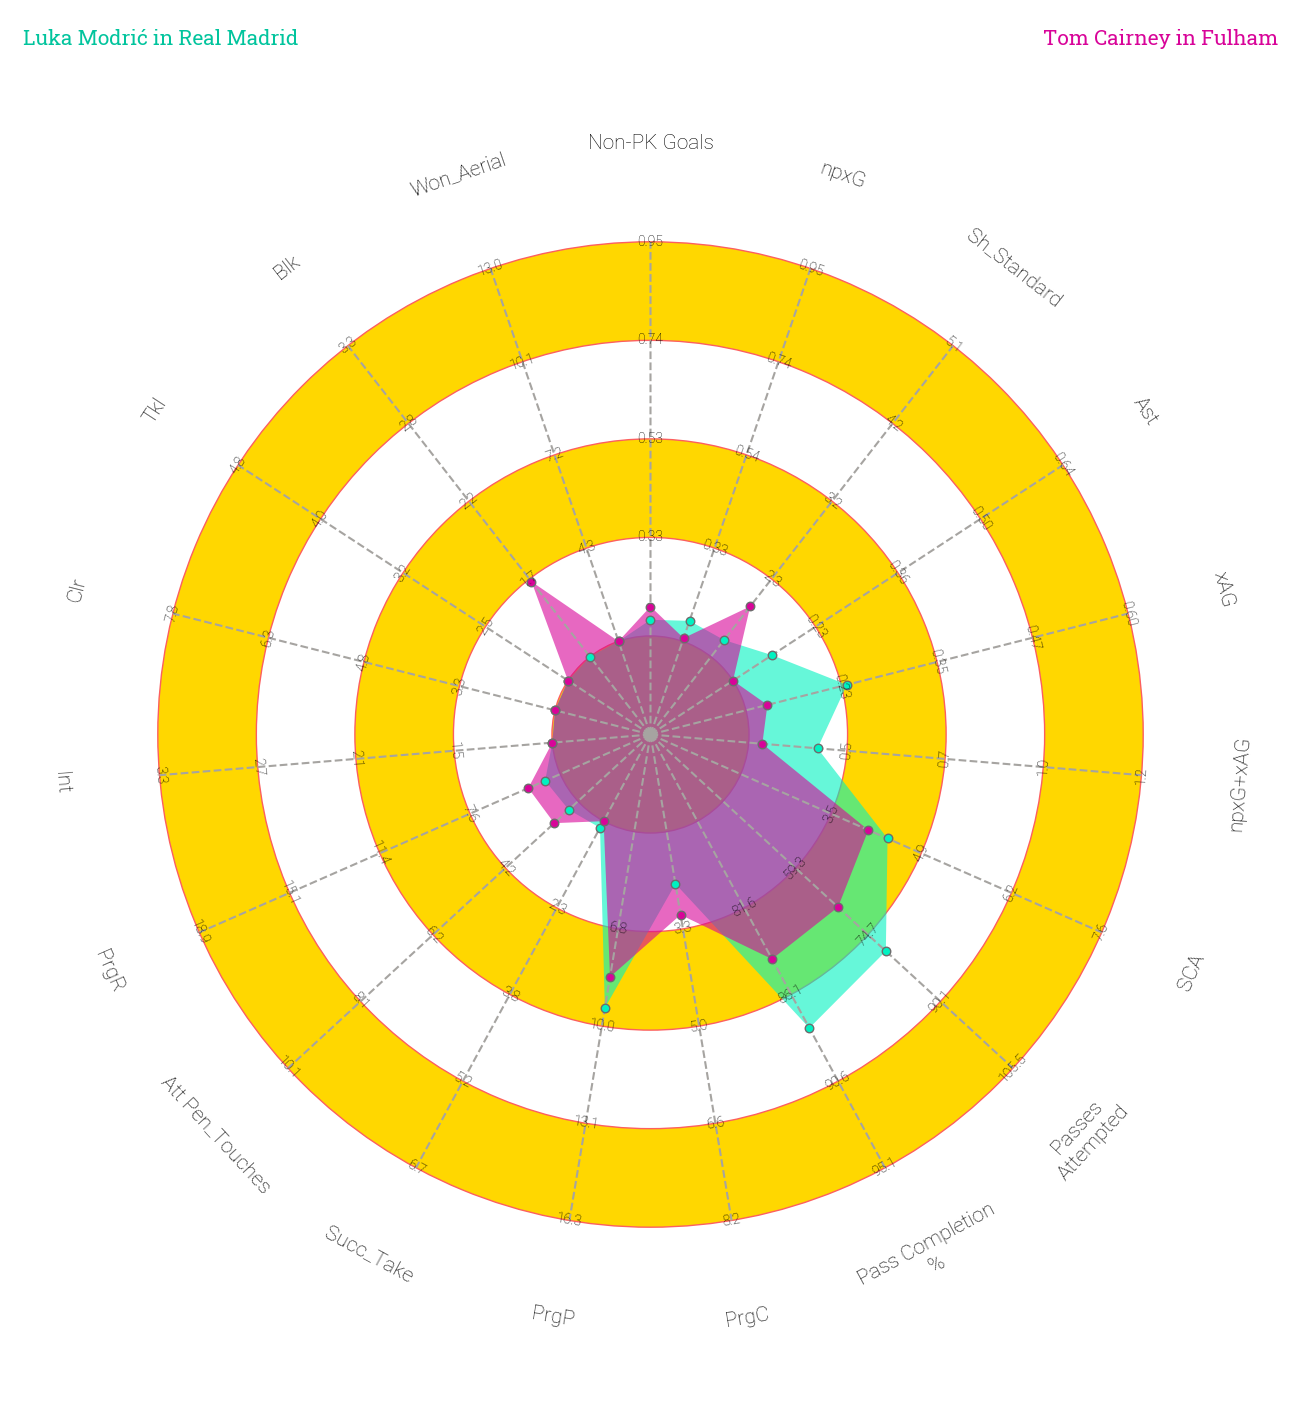

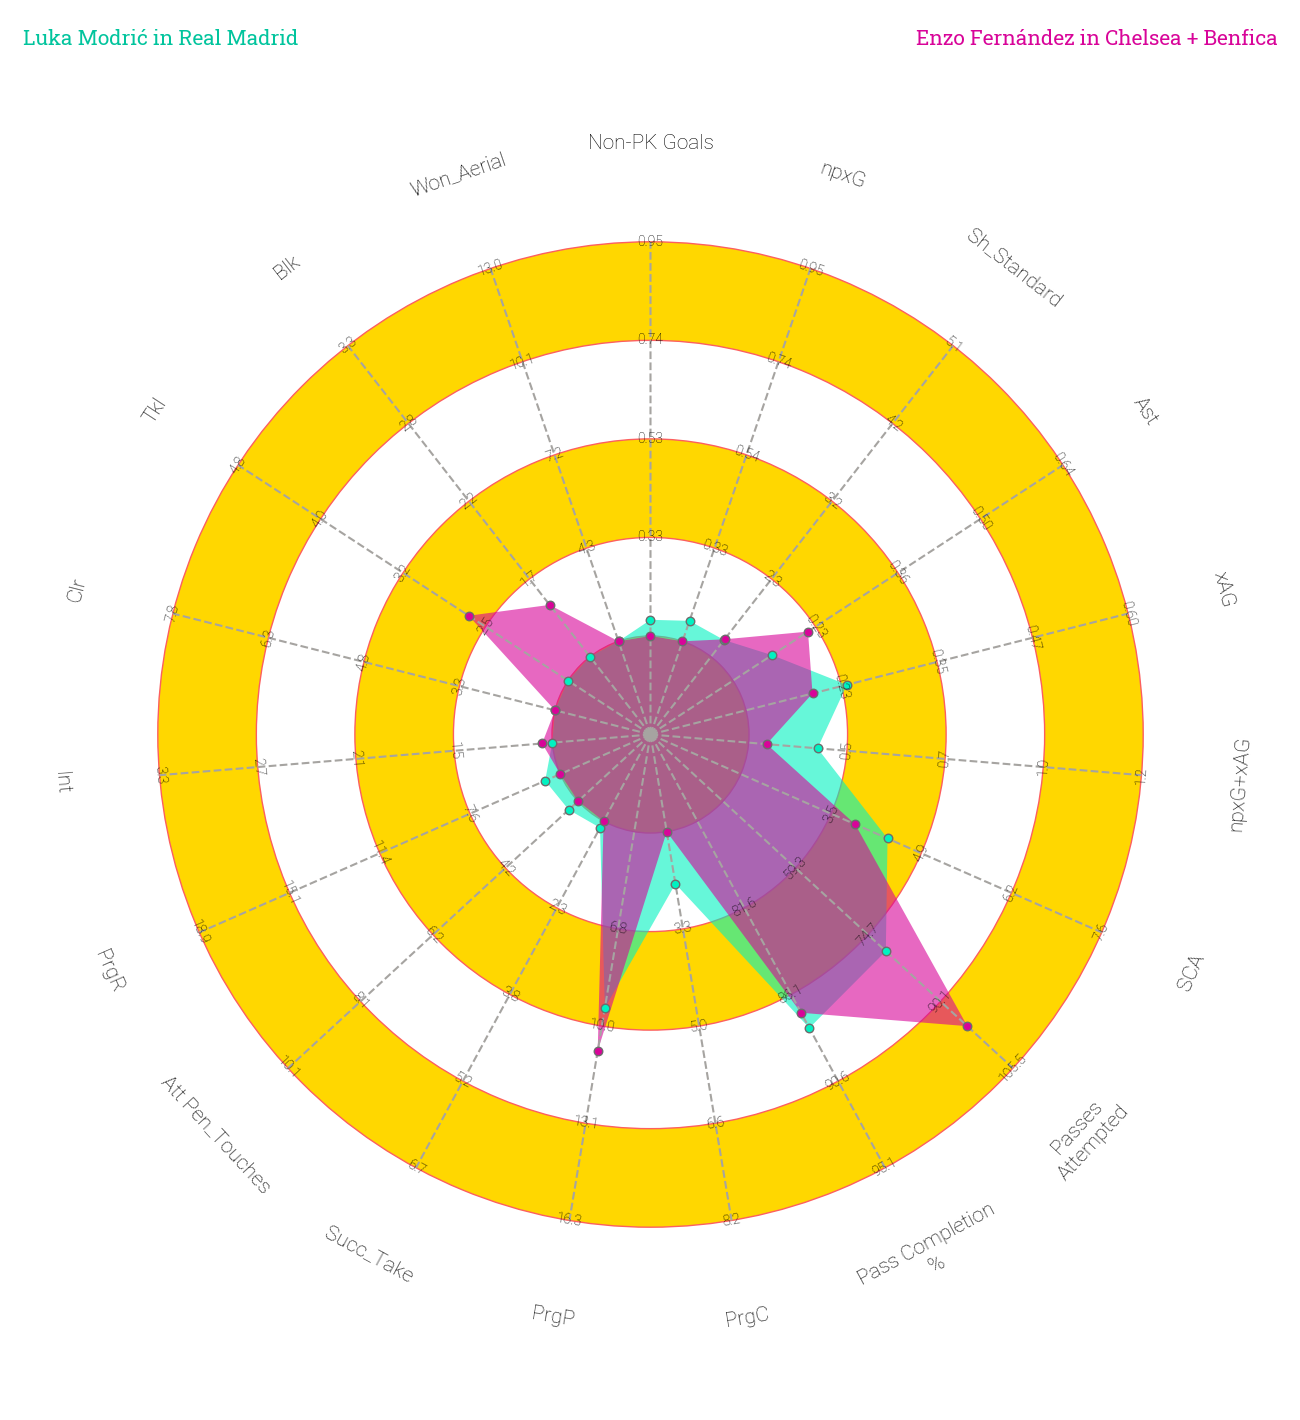

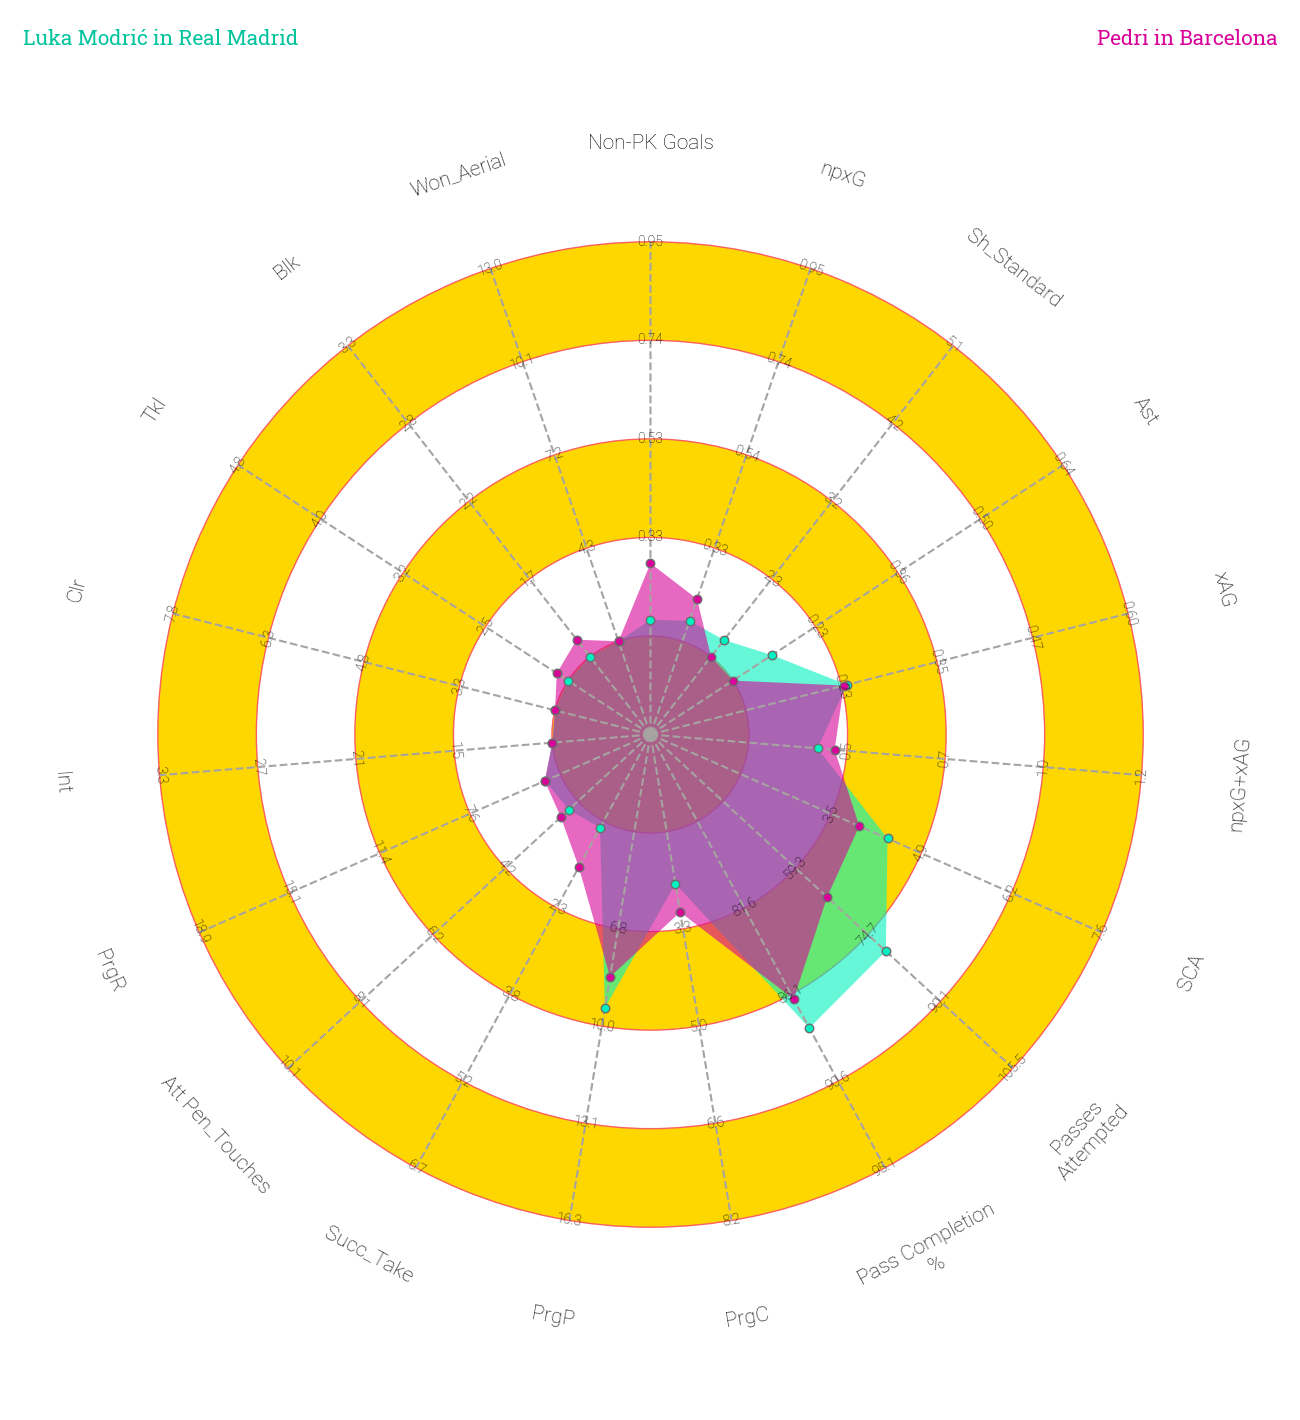

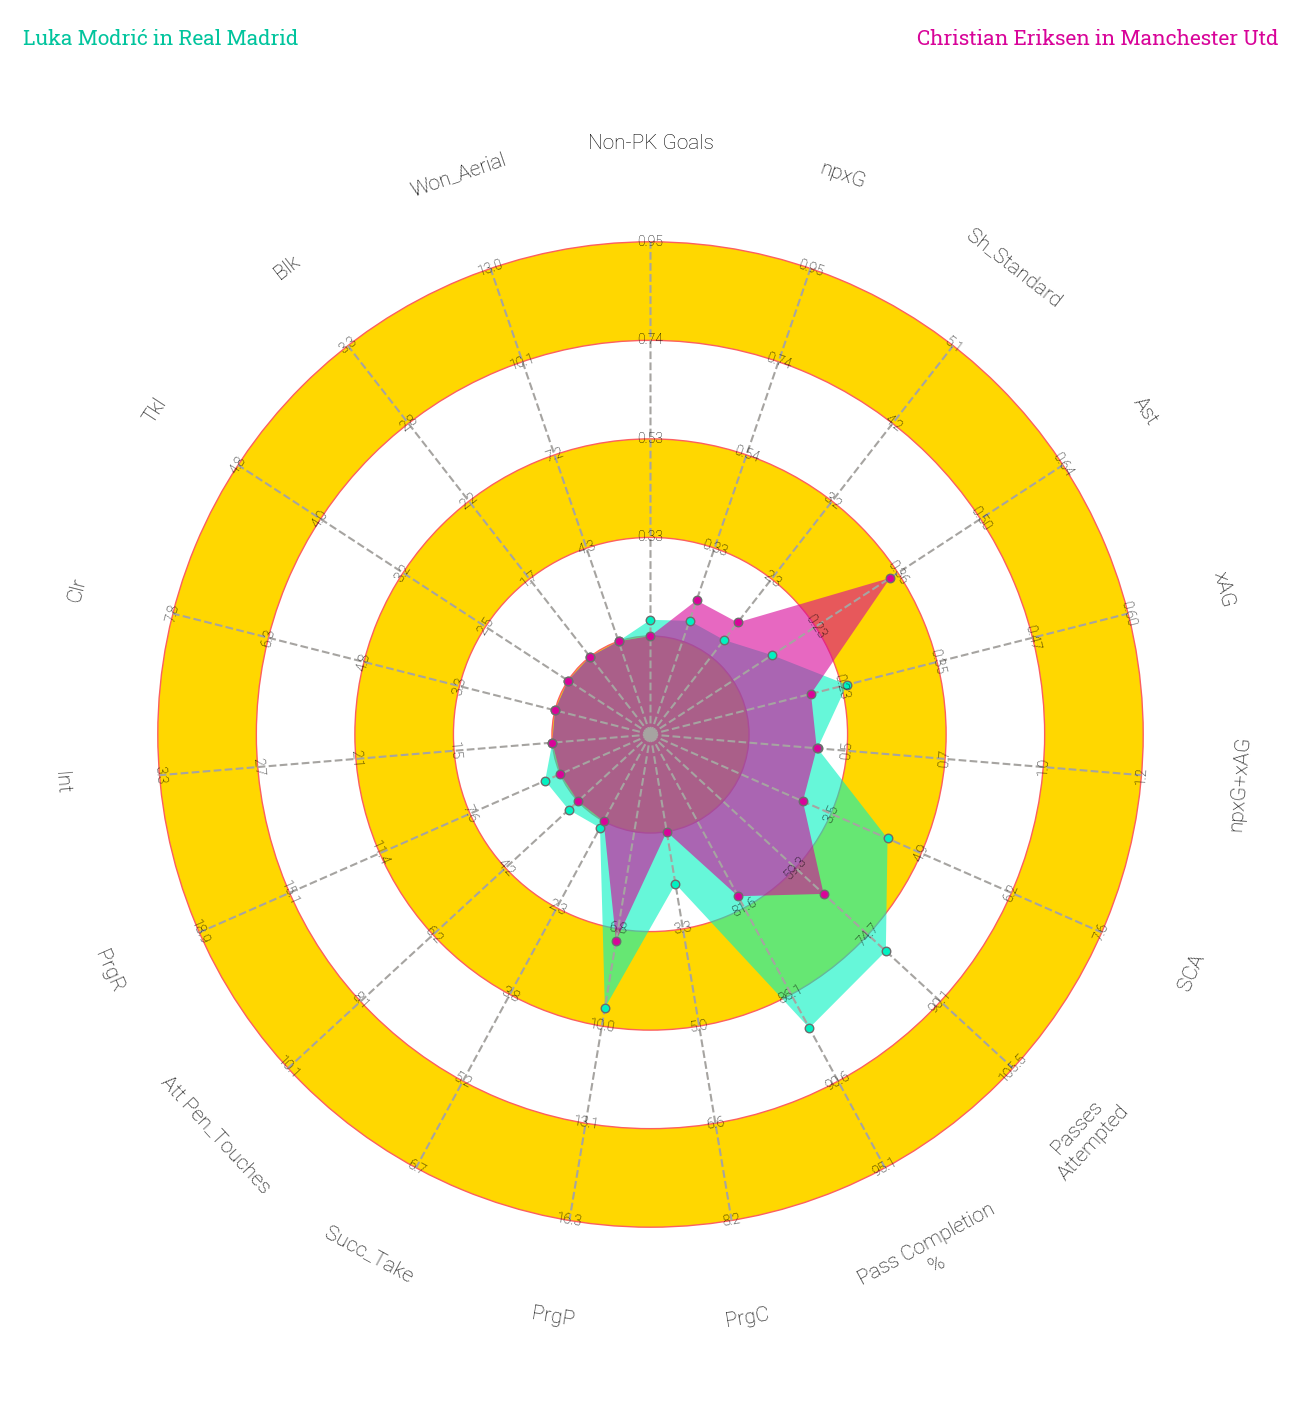

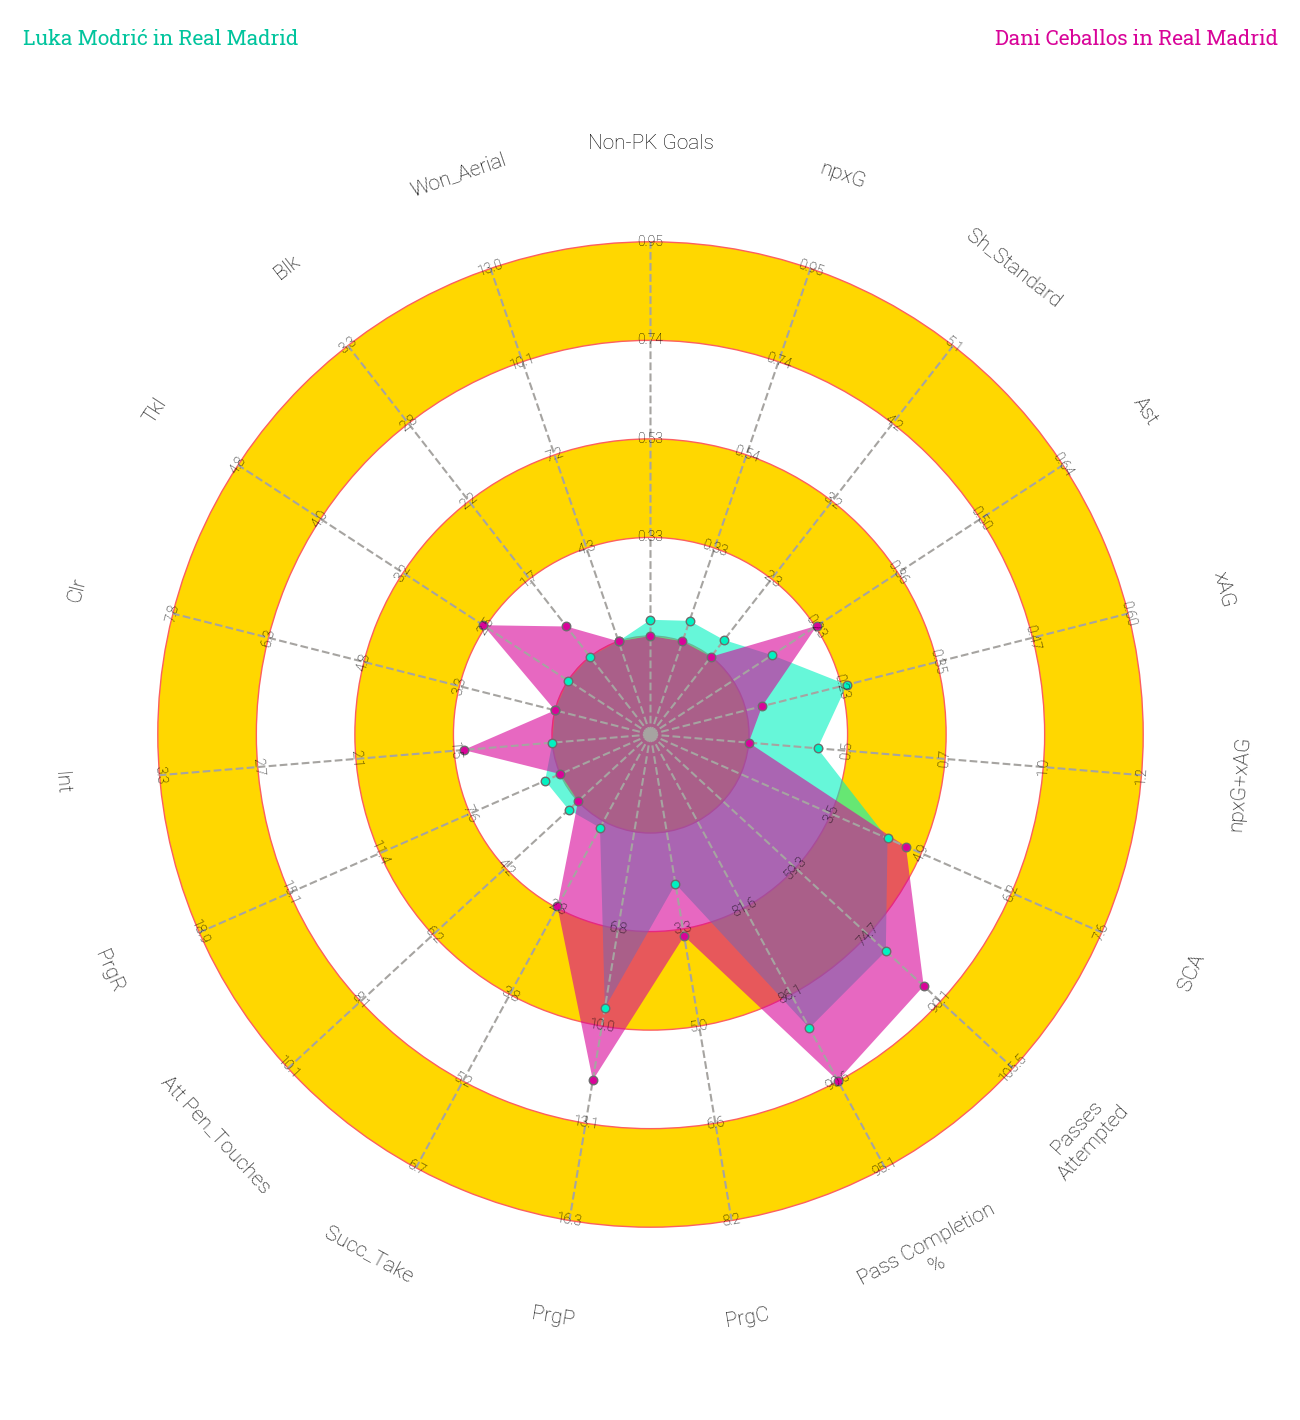

In [53]:
plot_top_10("Luka Modrić in Real Madrid")